## Analyze the hepmc files


In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak
import mplhep as hep
from __future__ import print_function
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.legend_handler import HandlerLine2D
#from scipy.stats import norm
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from scipy import integrate
import mplhep as hep
hep.set_style(hep.style.CMS)

params = {'legend.fontsize': '30',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'40',
         'ytick.labelsize':'40',
         'axes.labelsize': '30',
         'axes.titlesize': '40'}
#plt.rc_params[axis='y', which='both')
plt.style.use(hep.style.CMS)
plt.rcParams.update(params)
plt.rcParams['xtick.major.size'] = 20
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2


plt.rcParams['ytick.major.size'] = 20
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['ytick.minor.width'] = 2


plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#ax1.tick_params('both', length=20, width=2, which='major')
#ax1.tick_params('both', length=10, width=1, which='minor')


/tmp/ipykernel_40199/1288617336.py:19: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style(hep.style.CMS)


In [2]:
#### CHOOSE ELECTRON OR PION ('electron' and 'Pion')

#FilePathReco="/home/bishnu/EIC/Data/hepmc/CALICE/updatedW/"
#FilePathReco="/home/bishnu/EIC/Data/hepmc/CALICE/Steel/"
#FilePathReco="/home/bishnu/EIC/Data/hepmc/"  ## this is HCAL insert only data obviously with hole
FilePathReco="/home/bishnu/EIC/Data/hepmc/completeHCAL/"
## PATH WHERE FIGURE ARE SAVED  
PathToPlot='/home/bishnu/UCR_EIC/Plots/'        
 #(Mev) 
#Time_Threshold=200 #ns
#Energy_Threshold=0.06
#MIP=0.6 #GeV
Time_Threshold=150 #ns

MIP=0.8#MeV for CALICE Analysis
MIP=0.6 # MeV for Hcal insert 

Gev_To_MeV=1000
Sigma_For_leakage=3
Mean_pions=[]
Mean_electrons=[]
Energy_Threshold=0.1*MIP  #(0.5 * MIP for calice analysis)

#ienergy=10
theta=2.83
#theta=3.82
import plots

HELLO JELLO 200


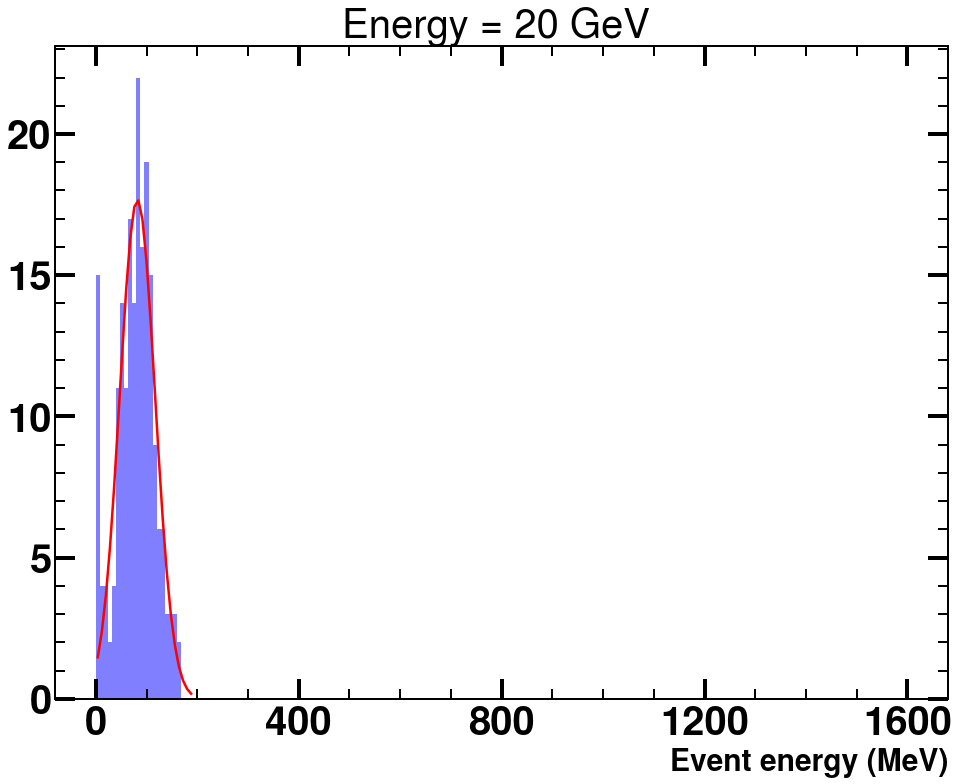

In [22]:
def get_fitted_mean_std():
   
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(1/10 of event is selected)
    #energies=[10,20,30,50,60,80,100]
    #energies=[10,20,30,40,50]
    energies=[20]
    for ienergy in energies:
        
        particle='pi-'
        
               
        ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile(fraction,FilePathReco,ienergy,theta,particle,Time_Threshold,Energy_Threshold)
        #plots.XY_plot2D_energy(PosRecoX,PosRecoY, ene, ienergy, particle)
        #plots.XY_plot2D(PosRecoX,PosRecoY, ienergy, particle)  
        #plots.distribution_1D(ene,'Energy',ienergy,particle)
        #plots.distribution_1D(ene,'Energy',ienergy,particle)
        #ene_tot = list( np.array(ene) + np.array(ene_total))
        #ene_tot=ene+ene_hcal
        #plots.distribution_1D(ene_tot,'Energy',ienergy,particle)
      
    
        
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error,pi_resolution,pi_resolution_error=plots.get_resolution(ene_good, ienergy, particle,Sigma_For_leakage) 
        pi_means.append(pi_mean)
        pi_stds.append(pi_std)
        pi_means_error.append(pi_mean_error)
        pi_stds_error.append(pi_sigma_error)
        pi_resolutions.append(pi_resolution)
        pi_resolution_errors.append(pi_resolution_error)
        pi_leaks_per.append(pi_leak_per)
        pi_leaks_per_error.append(pi_leak_per_error)
        
        
        
        '''
        particle='e-'
        
        ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile(fraction,FilePathReco,ienergy,theta,particle,Time_Threshold,Energy_Threshold)
        
        el_mean, el_std, el_mean_error, el_sigma_error, el_leak_per, el_leak_per_error,el_resolution,el_resolution_error=plots.get_resolution(ene_good,  ienergy, particle,Sigma_For_leakage)
        
        el_means.append(el_mean)
        el_stds.append(el_std)
        el_means_error.append(el_mean_error)
        el_stds_error.append(el_sigma_error)
        el_resolutions.append(el_resolution)
        el_resolution_errors.append(el_resolution_error)
        el_leaks_per.append(el_leak_per)
        el_leaks_per_error.append(el_leak_per_error)
        
        ### PLOTS ZPOS, YPOS, ZPOS, ENERGY

        #plots.distribution_1D(ene,'Energy',ienergy,particle)
        #plots.distribution_1D(ene,'x_pos',ienergy,particle)
        #plots.distribution_1D(ene,'y_pos',ienergy,particle)
        #plots.distribution_1D(time,'time',ienergy,particle)
       
        #plots.XY_plot2D(PosRecoX,PosRecoY, ienergy, particle)
        #plots.XY_plot2D_energy(PosRecoX,PosRecoY, ene, ienergy, particle)
        #plots.plot2D_energy_time(time,ene,ienergy, particle) 
        
        '''
            
    
    #plots.print_decimal_pi('St', pi_means,  pi_means_error,  pi_stds,pi_stds_error, pi_leaks_per,  pi_leaks_per_error, pi_resolutions, pi_resolution_errors)
    #plots.print_decimal_el('St',el_means, el_means_error, el_stds,el_stds_error,el_leaks_per, el_leaks_per_error,el_resolutions,el_resolution_errors)
   
    
    

    
    

get_fitted_mean_std()

In [52]:
pi_meansCAL_T=[578.05,975.73,1180.10,1567.00 ]
pi_mean_mip=np.divide(pi_meansCAL_T,MIP)
print(pi_mean_mip)


paper_ene_pi=[24.5,    29.7,   39.9,     50.0,     60.1,        80.4,     100,        120] 
paper_mean_pi=[702,    838,    1.11e+3,  1.40e+3,  1.66e+3,     2.20e+3,  2.77e+3,  3.30e+3]

[ 696.45 1175.58 1421.81 1887.95]


# HCAL Insert  [ 51 W layers , 16.1 mm absorber and 3mm Sc]
## Resolution Values for the pions AND ELECTRONS WITH HOLE

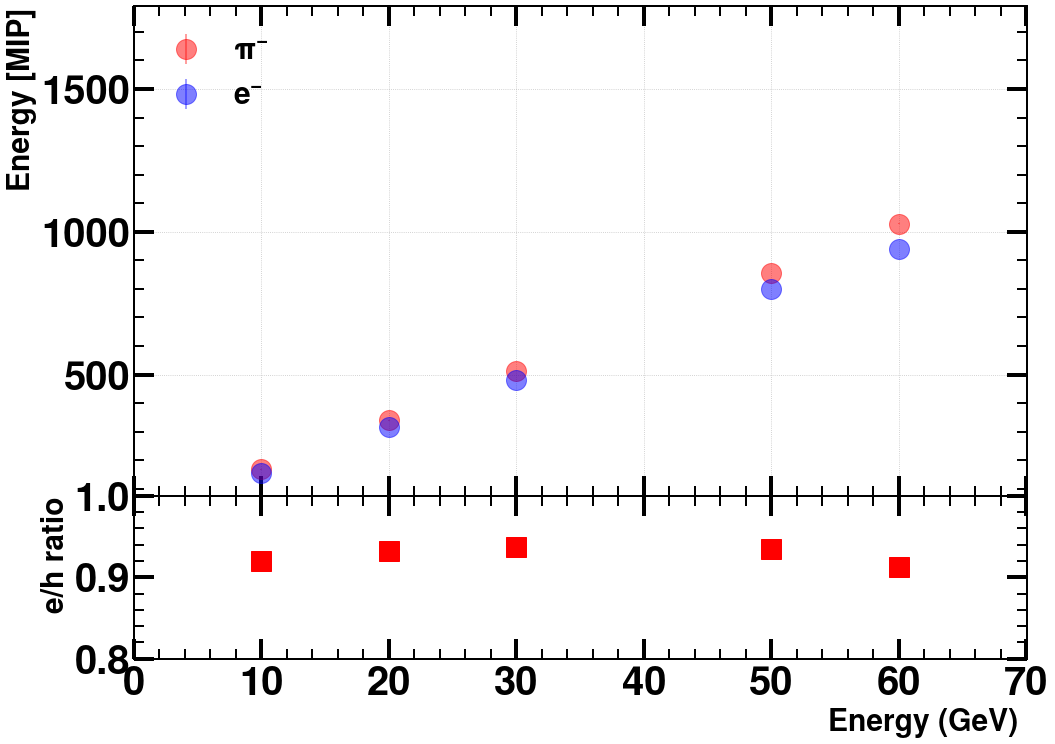

In [4]:
#ENERGIES FOR THE HOLE CONFIGURATION OF THE INSERT (DOES NOT CONTAINS THE 40 GeV)
energies_hole=[10,20,30,50,60,80,100]

## Energy FOR THE CALICE COMPARISON (INCLUDES 40 Gev)
#energies=[10,20,30,40,50,60,80,100]

## PION RESOLTUION AND LEAKAGE 
pi_means=[ 100.513,  203.689,  307.130,  513.718,  617.234,  825.731, 1025.764 ]
pi_means_error=[0.3702, 0.3394, 0.3763, 0.4931, 0.652,  0.6244, 0.8900 ]
pi_stds=[18.729, 25.897, 33.551, 46.004, 50.751, 60.059, 71.124 ]
pi_stds_error=[ 0.3702, 0.3394, 0.3763, 0.4931, 0.652,  0.6244, 0.8985]
pi_leaks_per=[ 10.64, 10.76,  9.66,  9.68,  9.88,  9.72, 10.371423]
pi_leaks_per_error=[ 0.4852, 0.4882, 0.4602, 0.4608, 0.4659, 0.4618, 0.482]
pi_resolutions=[ 0.1863, 0.1271, 0.1092, 0.0895, 0.0822, 0.0727, 0.0693]
pi_resolutions_errors=[0.003746, 0.00167980, 0.00123261, 0.0009637789, 0.00106031, 0.000758210, 0.00087804]






## ELECTRON RESOLUTON AND LEAKAGE
el_means= [ 92.406,189.962,287.916,480.005,563.283,694.14,796.799]
el_means_error= [0.35074,0.33654,0.43665,0.49562,0.3518 ,1.49 ,1.8745]
el_stds= [14.724,21.144,25.458,32.868,35.063,58.651,78.167]
el_stds_error= [0.35089,0.33674,0.43691,0.49616,0.35211,1.698,2.069]
el_leaks_per= [1.26,1.18,0.68,0.7 ,0.5 ,0.  ,0.  ]
el_leaks_per_error= [0.15974,0.15453,0.11701,0.11873,0.10025,0.     ,0.     ]
el_resolutions= [0.15934352,0.11130558,0.08842132,0.06847473,0.06224724,0.08239772, 0.09666697]
el_resolutions_errors= [0.0038451,0.0017836,0.0015234,0.0010361,0.0006263,0.0017666,0.0019954]

MIP_insert=0.6 ##MeV
pi_means_MIP=np.divide(pi_means,MIP_insert)
el_means_MIP=np.divide(el_means,MIP_insert)
pi_means_error_MIP=np.divide(pi_means_error,MIP_insert)
el_means_error_MIP=np.divide(el_means_error,MIP_insert)

ratio_hole=np.divide(el_means_MIP,pi_means_MIP)

## one percent error is assigned
ratio_hole_error=np.multiply(0.1,ratio_hole)
fig,(ax,ax1) = plt.subplots(2,1,figsize=(16, 12),gridspec_kw={'height_ratios': [3, 1]},sharex=True)
#fig, axes = plt.subplots(nrows=1, ncols=1)
ax.errorbar(energies_hole, pi_means_MIP, pi_means_error_MIP ,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20,label='$\pi^{-}$')
ax.errorbar(energies_hole,el_means_MIP, el_means_error_MIP,color="blue",alpha=0.5,marker='o',linestyle='None',markersize=20,label='$e^{-}$')
ax.set_ylabel('Energy [MIP]')
#ax.set_xlabel('Energy (GeV) ')

#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.set_ylim(0,3500)
ax.set_xlim(0,90)
#ax.set_title("Fe-AHCAL ($\pi^-$)")

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)


ax1.plot(energies_hole,ratio_hole,ratio_hole_error,marker='s',markersize='20',color='r',linestyle='None')
ax1.set_ylim(0.8,1.0)
ax1.set_xlim(0,70)
ax1.yaxis.set_major_locator(MultipleLocator(0.1))   
ax1.set_xlabel('Energy (GeV) ')
ax1.set_ylabel("e/h ratio")


plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()
ax.legend(loc='upper left')

#ax.set_title("Resolution")


#plots.plot_resolution(energies,'el-',el_means, el_stds, el_means_error, el_stds_error, el_resolutions, el_resolutions_errors, el_leaks_per,el_leaks_per_error,Sigma_For_leakage)
#plots.plot_resolution(energies,'pi-',pi_means, pi_stds, pi_means_error, pi_stds_error, pi_resolutions, pi_resolutions_errors, pi_leaks_per,pi_leaks_per_error,Sigma_For_leakage)   

### Resolution for  electrons and pions with holes

In [7]:
def plot_eh_ratio(energies,mean_eg,mean_pi_eg):
    fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
    #index = energies.index(60)
    index=5
    #print (index)
    energies=np.asarray(energies)
   
    mean_e=np.asarray(mean_eg)
    mean_pi=np.asarray(mean_pi_eg)
    #print(energies, mean_e,mean_pi)
    
    mask=(energies<60)
    
    mean_pi=mean_pi[0:index]
    mean_e=mean_e[0:index]
    ratio_eh=np.divide(mean_e,mean_pi)
    print(ratio_eh)
    print(mean_e)
    #print(mean_pi)
    
    ax.plot(energies[0:index],ratio_eh, color="red",marker='o',linestyle='None',markersize=20,label='$\pi^-$')
    ax.set_xlim(0,60)
    ax.set_ylim(0.90,1.10)
    ax.set_ylabel('e/h')
    ax.set_xlabel('Energy (GeV) ')
    plt.show()
    











## Without hole for comparsion with CALICE

In [ ]:
## insert without hole 
pi_means_NH=[101.01,204.35,308.15,513.91,616.64,819.93,1022.98 ]
pi_means_error_NH=[0.530,0.564,0.666,0.736,0.713,0.743,1.048 ]
pi_stds_NH=[ 17.71,25.22,32.95,44.31,48.58,56.81,69.29 ]
pi_stds_error_NH=[ 0.530,0.564,0.666,0.736,0.713,0.743,1.048 ]
pi_leaks_per_NH=[ 0.920,0.560,0.600,0.640,0.640,1.060,1.300 ]
pi_leaks_per_error_NH=[ 0.1363,0.1061,0.1099,0.1135,0.1135,0.1464,0.1623 ]
pi_resolutions_NH=[ 0.17538,0.12341,0.10693,0.08622,0.07878,0.06928,0.06774 ]
pi_resolutions_errors_NH=[ 0.0053,0.0028,0.0022,0.0014,0.0012,0.0009,0.0010 ]



el_means_NH=[91.26,184.22,276.06,460.13,544.01,681.06,786.77 ]
el_means_error_NH=[ 0.204,0.273,0.288,0.420,0.480,1.220,1.837 ]
el_stds_NH=[ 11.00,15.86,18.93,24.37,27.88,51.80,71.29 ]
el_stds_error_NH=[ 0.204,0.274,0.289,0.420,0.481,1.228,1.844 ]
el_leaks_per_NH=[ 0.140,0.080,0.100,0.120,0.120,0.000,0.000 ]
el_leaks_per_error_NH=[ 0.0530,0.0400,0.0447,0.0490,0.0490,0.0000,0.0000 ]
el_resolutions_NH=[ 0.12058,0.08608,0.06857,0.05297,0.05126,0.07606,0.09061 ]
el_resolutions_errors_NH=[ 0.0023,0.0015,0.0010,0.0009,0.0009,0.0018,0.0024 ]


## This is with the 0.5 * MIP cut This is not 
energy_CAL_T_pi=[10,20,40,30,50,60,80,100]

pi_meansCAL_T=[197.80,  401.81,  599.18, 809.65  ,1013.66,1221.68,1620.62,2025.23 ]
pi_means_errorCAL_T=[0.851,1.887,1.451, 1.726   ,2.335,3.250,3.645,5.167 ]
pi_stdsCAL_T=[ 32.59,47.89,52.68,   74.27  ,76.05,90.00,105.08,153.38 ]
pi_stds_errorCAL_T=[ 0.851,1.887,1.451,  1.726  ,2.335,3.250,3.645,5.167 ]
pi_leaks_perCAL_T=[ 3.153,4.204,7.357,  7.000  ,11.261,10.360,13.063,10.811 ]
pi_leaks_per_errorCAL_T=[ 0.6988,0.8110,1.0890, 0.7066 ,1.3716,1.3103,1.4892,1.3412 ]
pi_resolutionsCAL_T=[ 0.16479,0.11920,0.08792,   0.09173 , 0.07502,0.07367,0.06484,0.07573 ]
pi_resolutions_errorsCAL_T=[ 0.0044,0.0047,0.0024, 0.0021,  0.0023,0.0027,0.0023,0.0026 ]


energy_CAL_T_el=[10,20,30,40,50]
el_meansCAL_T=[18.79 ,60.19,122.71,206.04,413.35,625.44,825.73,1002.25 ]
el_means_errorCAL_T=[0.366 ,0.524,0.438 , 1.514,0.650,1.090,2.888,2.253 ]
el_stdsCAL_T=[5.67, 10.18,14.31 ,19.02,24.22,29.76,35.23,49.65 ]
el_stds_errorCAL_T=[ 0.371 ,0.525,0.439 , 1.521,0.651,1.091,2.893,2.261 ]
el_leaks_perCAL_T=[0.133 , 0.000,0.133 ,0.000,0.200,0.000,0.600,0.000 ]
el_leaks_per_errorCAL_T=[0.0943,0.0000,0.0943 , 0.0000,0.2002,0.0000,0.3474,0.0000 ]
el_resolutionsCAL_T=[   0.30188,0.16919,0.11664, 0.09230,0.05861,0.04758,0.04267,0.04954 ]
el_resolutions_errorsCAL_T=[ 0.0206,0.0088,0.0036 ,0.0074,0.0016,0.0017,0.0035,0.0023 ]




## For steel calorimeter CALICE
energy_CAL_St_pi=[10,20,30,40,50,60,80,100]

pi_meansCAL_St=[324.29, 650.22,  976.19,  1314.45 , 1621.86, 1971.91,2591.24,3206.94 ]
pi_means_errorCAL_St=[1.760,3.557,2.764, 4.156 , 4.529,4.284,6.222,12.015 ]
pi_stdsCAL_St=[ 45.25,67.42,83.81,  104.29  ,140.88,148.86,194.26,270.44 ]
pi_stds_errorCAL_St=[ 1.760,3.557,2.764, 4.156  ,4.529,4.284,6.222,12.030 ]
pi_leaks_perCAL_St=[ 3.721,7.803,11.164,  14.133  ,12.125,13.806,14.046,13.926 ]
pi_leaks_per_errorCAL_St=[ 0.6807,1.0049,1.2206, 1.4666   ,1.2775,1.3734,1.3867,1.3800 ]
pi_resolutionsCAL_St=[ 0.13954,0.10369,0.08585,  0.07934  ,0.08686,0.07549,0.07497,0.08433 ]
pi_resolutions_errorsCAL_St=[ 0.0055,0.0055,0.0028, 0.0032 ,0.0028,0.0022,0.0024,0.0038 ]

energy_CAL_St_el=[10,20,30,40,50]
el_meansCAL_St=[330.49, 665.93, 1000.36, 1338.12, 1666.70 ]
el_means_errorCAL_St=[ 0.155,1.425,1.527,1.882,2.198 ]
el_stdsCAL_St=[ 21.82,31.81,37.06,40.01,50.06 ]
el_stds_errorCAL_St=[ 0.155,1.430,1.532,1.884,2.201 ]
el_leaks_perCAL_St=[ 0.400,0.200,0.600,0.600,0.400 ]
el_leaks_per_errorCAL_St=[ 0.2834,0.2002,0.3474,0.3474,0.2834 ]
el_resolutionsCAL_St=[ 0.06602,0.04777,0.03705,0.02990,0.03004 ]
el_resolutions_errorsCAL_St=[ 0.0005,0.0022,0.0015,0.0014,0.0013 ]


#plt.show()
print(len(energy_CAL_St_el),'    ', len(el_resolutionsCAL_T))


#plot_eh_ratio(energies,el_meansCAL_T,pi_meansCAL_T)
plot_eh_ratio(energy_CAL_St_el,el_meansCAL_St,pi_meansCAL_St)

#### VALues from the CALICE PAPER FOR ELECTRON
Cal_energy=[0.969,2.00,2.99,3.99,4.98, 5.97,  15,20,30,40]
Cal_res=[0.318,  0.215,0.170,  0.144, 0.124, 0.119, 0.07,0.06,0.05,0.04]
Cal_res_err=np.multiply(Cal_res,0.01)



#### Yellow report data from CALICE paper 
import numpy as np
import pandas as pd

path_file = '/home/bishnu/Downloads/YR_report_pion.csv'
#fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
df = pd.read_csv(f'{path_file}',header=None, names=['energy', 'resolution'], index_col=False)

#print(data)
df=df.sort_values(by=['energy'],ascending =True)
#df.head(20)

### CALICE PAPER  FOR PION 
energy_cal_pi=[3.01,4.01,  4.98,  6.01,  7.01,  8.02,   9.01,  9.99,  25,  30,     40,50,60,   80,100]
cal_pi_res=[0.362,   0.325, 0.288, 0.263, 0.245, 0.227,  0.216, 0.205, 0.115,0.108, 0.092,0.088,0.082,0.078,0.06]
cal_pi_res_err=np.multiply(cal_pi_res,0.01)
cal_pi_ene=[5,10,20,50,80,100]
cal_pi_YR=[0.20,0.18,0.135,0.125,0.1175,0.115]
cal_pi_YR_err=[0.0020,0.0018,0.00135,0.00125,0.001175,0.00115]

## Compare resoltuion of two calorimeter

In [59]:

fig,ax = plt.subplots(1,1, figsize=(12, 8),sharex=True,sharey=True)
ax.plot(energy_CAL_St_pi,pi_resolutionsCAL_St,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20,label='Fe-AHCAL')
ax.plot(energy_CAL_T_pi,pi_resolutionsCAL_T,color="blue",alpha=0.5,marker='o',linestyle='None',markersize=20,label='T-AHCAL')
plt.legend()
ax.set_title('$\pi^- resoltuion$')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Resolution')
plt.show()

el_resolutionsCAL_T_here=[0.09230,0.05861,0.04758,0.04267,0.04954 ]
fig,ax = plt.subplots(1,1, figsize=(12, 8),sharex=True,sharey=True)
ax.plot(energy_CAL_St_el,el_resolutionsCAL_St,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20,label='Fe-AHCAL')
ax.plot(energy_CAL_St_el,el_resolutionsCAL_T_here,color="blue",alpha=0.5,marker='o',linestyle='None',markersize=20,label='T-AHCAL')
ax.set_title('$e^- resoltuion$')
ax.set_xlim(0,55)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Resolution')
plt.legend()

15
15


## Resolution comparsion for w-AHCAL and paper

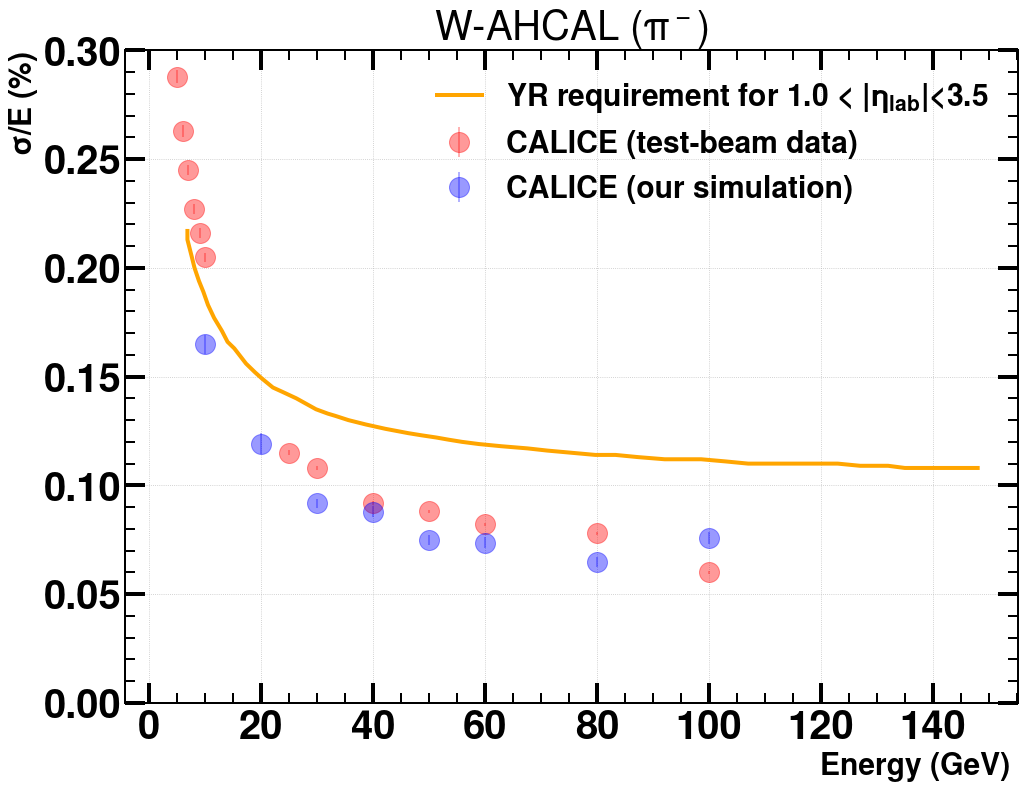

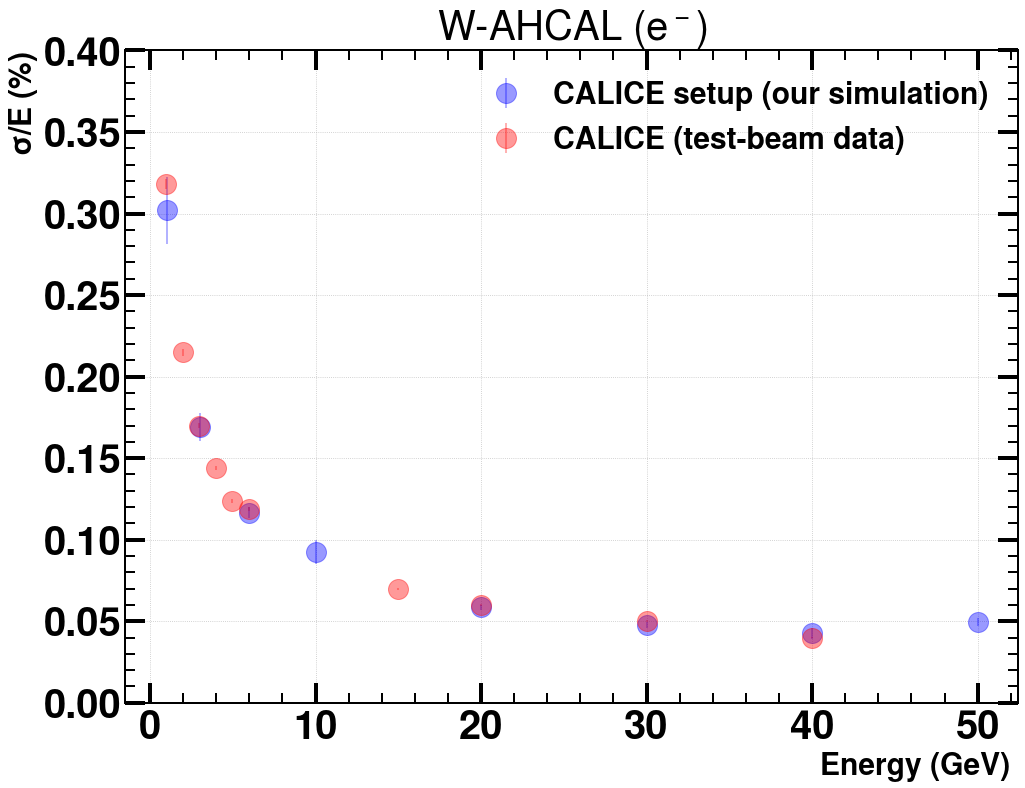

In [62]:
PathToPlot='/home/bishnu/UCR_EIC/Plots/hepmc/'

#### Resolutions
#el_resolutions=np.multiply(el_resolutions,100)
#el_resolutions_errors=np.multiply(el_resolutions_errors,100)
#pi_resolutions=np.multiply(pi_resolutions,100)
#pi_resolutions_errors=np.multiply(pi_resolutions_errors,100)



#print(el_resolutions)
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(energy_cal_pi,cal_pi_res, cal_pi_res_err,color="red",marker='o',alpha=0.4,linestyle='None',markersize=20,label='CALICE (test-beam data)')

ax.errorbar(energy_CAL_T_pi,pi_resolutionsCAL_T, pi_resolutions_errorsCAL_T,color="blue",alpha=0.4,linestyle='None',marker='o',markersize=20,label='CALICE (our simulation)')

df.plot(x='energy',y='resolution',linestyle='solid',linewidth=4,color='orange',ax=ax, label='YR requirement for 1.0 < $|\eta_{lab}|$<3.5')
ax.set_ylabel('$\sigma$/E (%)')
ax.set_xlabel('Energy (GeV) ')
ax.set_title("W-AHCAL ($\pi^-$)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,0.3)

ax.xaxis.set_major_locator(MultipleLocator(20))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("Resolution")
FigName="Res_pi-_Energy.png"
plt.legend()
plt.savefig(f"{PathToPlot}{FigName}")
plt.show()
        
#### FOR ELECTRON 
energies_el=[1,3,6,10,20,30,40,50]           
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
energies_el=np.asarray(energies_el)
el_resolutionsCAL_T=np.asarray(el_resolutionsCAL_T)
el_resolutions_errorsCAL_T=np.asarray(el_resolutions_errorsCAL_T)

#el_resolutions=np.asarray(el_resolutions)
#el_resolutions_errors=np.asarray(el_resolutions_errors)

#el_resolutions_NH=np.asarray(el_resolutions_NH)
#el_resolutions_errors_NH=np.asarray(el_resolutions_errors_NH)

mask=energies_el<60

ax.errorbar(energies_el,el_resolutionsCAL_T, el_resolutions_errorsCAL_T[mask],alpha=0.4,linestyle='None',color="blue",marker='o',markersize=20,label='CALICE setup (our simulation)')
ax.errorbar(Cal_energy,Cal_res, Cal_res_err,color="red",marker='o',markersize=20,alpha=0.4,linestyle='None',label='CALICE (test-beam data)')

ax.set_ylabel('$\sigma$/E (%)')
ax.set_xlabel('Energy (GeV) ')
ax.set_title("W-AHCAL ($e^-$)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,0.4)

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("Resolution")
FigName="Res_e-_Energy.png"
plt.legend()
plt.savefig(f"{PathToPlot}{FigName}")
plt.show()





In [60]:
paper_ene_el=[40.0,     30.0, 20.0, 15.1] 
paper_mean_el=[1.15e+3, 871,  576,  435]
paper_mean_el.sort()
print(paper_mean_el)



[435, 576, 871, 1150.0]


### W-AHCAL FOR THE MEAN 

[ 247.25    502.2625  748.975  1012.0625 1267.075  1527.1    2025.775
 2531.5375]


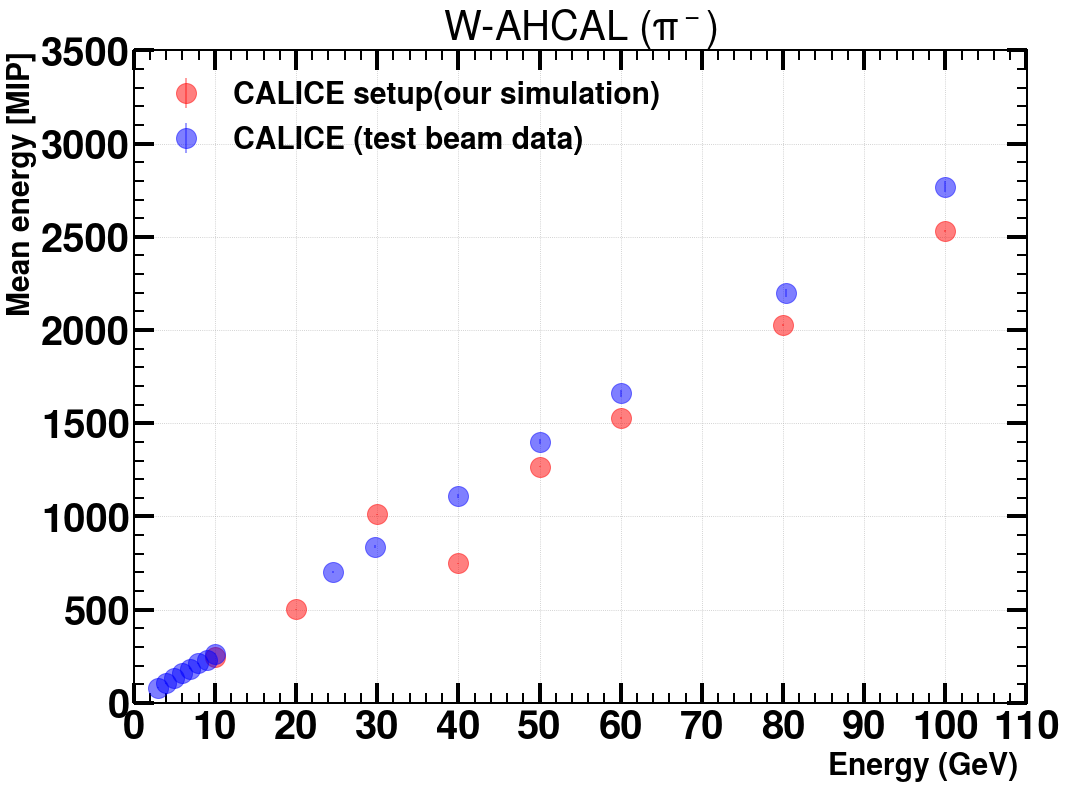

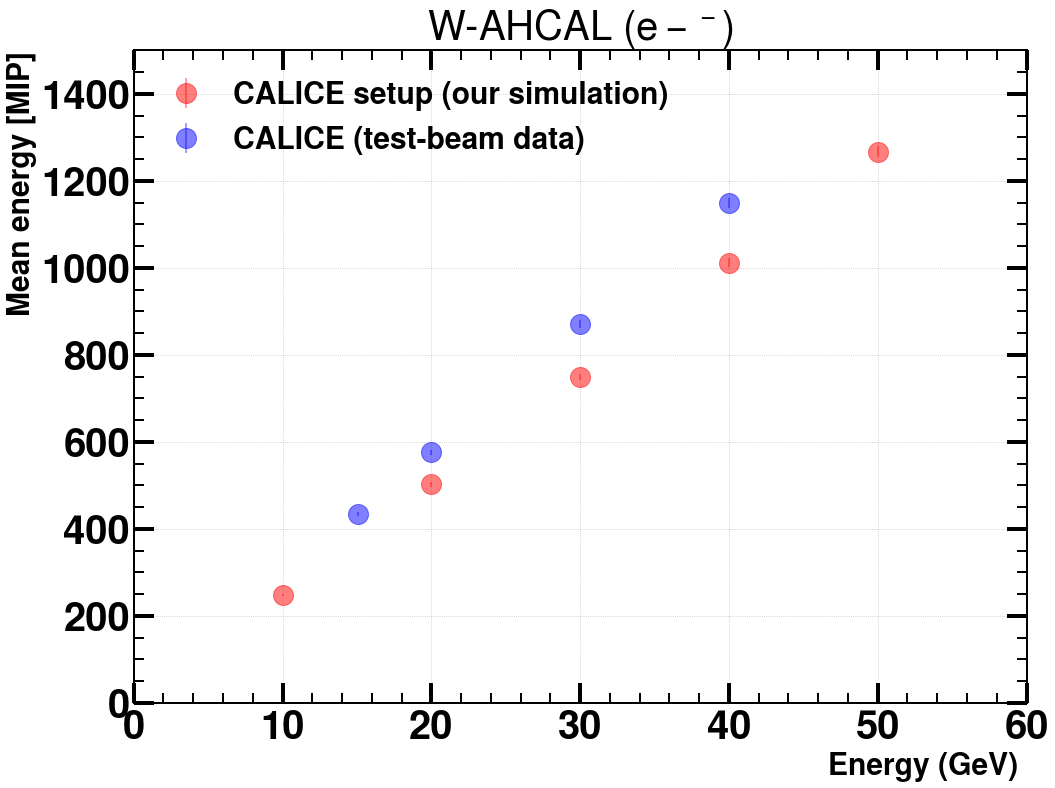

In [61]:
paper_ene_pi=[2.96, 3.97, 5.00,5.96, 6.97, 7.96, 8.99, 9.97,24.5,    29.7,   39.9,     50.0,     60.1,        80.4,     100,        120] 
paper_mean_pi=[81.3, 104, 134, 160, 183, 212, 231, 263, 702,    838,    1.11e+3,  1.40e+3,  1.66e+3,     2.20e+3,  2.77e+3,  3.30e+3]



### T

paper_ene_el=[15.1, 20.0, 30.0, 40.0]#[40.0,     30.0, 20.0, 15.1] 
paper_mean_el=[435, 576, 871, 1150.0]#[1.15e+3, 871,  576,  435]


#[498.01204819  753.54216867  994.85542169]

ratio_mean_pi=[1.39,1.38, 1.36,1.35,1.37] ## just for the reference

energies_el=[10,20,30,40,50]

pi_meansCAL_T_MIP=np.divide(pi_meansCAL_T,MIP)
pi_means_errorCAL_T_MIP=np.divide(pi_means_errorCAL_T,MIP)


el_meansCAL_T_MIP=np.divide(el_meansCAL_T,MIP)
el_means_errorCAL_T_MIP=np.divide(el_means_errorCAL_T,MIP)
print(pi_meansCAL_T_MIP)


paper_error_mean_pi=np.multiply(paper_mean_pi,0.01)
paper_error_mean_el=np.multiply(paper_mean_el,0.01)
#fig,(ax,ax1) = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)




ax.errorbar(energy_CAL_T_pi,pi_meansCAL_T_MIP, pi_means_errorCAL_T_MIP ,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20,label='CALICE setup(our simulation)')
ax.errorbar(paper_ene_pi,paper_mean_pi, paper_error_mean_pi,color="blue",alpha=0.5,marker='o',linestyle='None',markersize=20,label='CALICE (test beam data)')
ax.set_ylabel('Mean energy [MIP]')
ax.set_xlabel('Energy (GeV) ')
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,3500)
ax.set_xlim(0,110)

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_title("W-AHCAL ($\pi^-$)")
#ax.set_title("Resolution")
FigName="Comp_Mean_e_pi.png"
ax.legend()



fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
#el_meansCAL_T=[196.68,390.73,589.30,  777.13 ,942.71,1083.57,1294.99,1516.84 ]
#el_means_errorCAL_T


#el_meansCAL_T=np.asarray(el_meansCAL_T)
#el_means_errorCAL_T=np.asarray(el_means_errorCAL_T)
el_meansCAL_T_MIP_eqi=[ 247.25,    502.2625,  748.975,  1012.0625, 1267.075]
energy_eqi_here=[10,20,30,40,50]
el_means_errorCAL_T_MIP_eqi=np.multiply(el_meansCAL_T_MIP_eqi,0.01)
ax.errorbar(energy_eqi_here,el_meansCAL_T_MIP_eqi, el_means_errorCAL_T_MIP_eqi,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20,label='CALICE setup (our simulation)')
ax.errorbar(paper_ene_el,paper_mean_el, paper_error_mean_el,color="blue",alpha=0.5,marker='o',linestyle='None',markersize=20,label='CALICE (test-beam data)')
ax.set_ylabel('Mean energy [MIP]')
ax.set_ylabel('Mean energy [MIP]')
ax.set_xlabel('Energy (GeV) ')
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,1500)
ax.set_xlim(0,60)
ax.set_title("W-AHCAL ($e-^-$)")
ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("Resolution")
FigName="Comp_Mean_e_pi.png"
ax.legend()



## CALICE STEEL CALORIMETER

[0.85102131 0.86099389 0.87320423 0.85609716 0.87595939 0.86027636
 0.87613776]


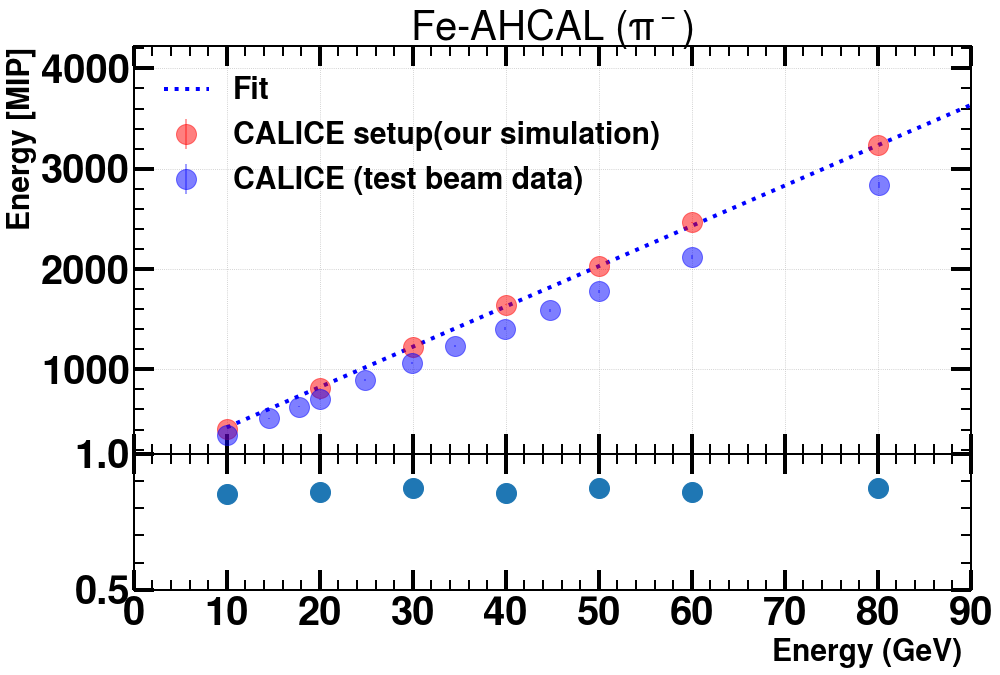

<Figure size 1080x720 with 0 Axes>

In [24]:
Factor=1
#### Resoulution pion data from paper
energy_cal_pi_St=[10.1, 14.9,20.1, 25.2,35.0, 40.2, 44.9, 50.0, 60.0, 80.0] 
cal_pi_res_St=[0.175, 0.147,0.130,  0.116,0.0963,0.0922,0.0870, 0.0812, 0.0738,0.0623]
cal_pi_res_err=np.multiply(cal_pi_res_St,0.01)



##https://iopscience.iop.org/article/10.1088/1748-0221/6/04/P04003/pdf
energy_cal_e_St=[9.96,15.0, 20.0, 30.0,40.1,50.0]
cal_e_res_St=[7.19, 5.88, 4.97,  3.92,   3.47, 3.35]
el_resolutionsCAL_Stp=np.multiply(el_resolutionsCAL_St,100)
cal_e_res_err=np.multiply(cal_e_res_St,0.01)



## MEAN VALUE FOR ELECTRON FOR THE  PAPER
paper_ene_el_St=[10.1, 15.0,  20.1, 30.0,40.0, 49.9]
paper_mean_el_St=[9.91,15.1,  20.2, 30.1, 39.4,48.4]
paper_error_mean_el_St=np.multiply(paper_mean_el_St,0.01)

## MEAN VALUE FOR PION FOR THE PAPER
paper_mean_pi_St=[9.81, 14.6, 17.8, 19.9, 25.5, 30.3, 35.0, 40.0, 45.2, 50.5, 60.3, 80.7]
paper_ene_pi_St=[10.0, 14.5, 17.8, 20.0, 24.9, 29.9, 34.6, 39.9, 44.8, 50.0, 60.0, 80.1]


#paper_ene_pi_St=[80.1,60.0, 50.0,44.8, 39.9, 34.6,29.9, 24.9, 20.0,17.8, 14.5, 10.0] ## From paper
#paper_mean_pi_St=[80.7,60.3,50.5,45.2,40.0,35.0,30.3,25.5,19.9,17.8,14.6,9.81]
paper_error_mean_pi_St=np.multiply(paper_mean_pi_St,0.01)

#pi_meansCAL_St_GeV=np.multiply(pi_meansCAL_St,)
#pi_means_errorCAL_St_GeV =np.multiply(pi_means_errorCAL_St,Factor)

'''
#RESOLUTIONS 
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
## PAPER
ax.errorbar(energy_cal_pi_St,cal_pi_res_St, cal_pi_res_err,color="red",marker='o',alpha=0.4,linestyle='None',markersize=20,label='CALICE (test-beam data)')
## Simulation values
ax.errorbar(energy_CAL_St_pi,pi_resolutionsCAL_St, pi_resolutions_errorsCAL_St,color="blue",alpha=0.4,linestyle='None',marker='o',markersize=20,label='CALICE (our simulation)')


ax.set_ylabel('Resolution')
ax.set_xlabel('Energy (GeV) ')
ax.set_title("Fe-AHCAL ($\pi^-$)")
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,0.3)
ax.set_xlim(0,90)

ax.xaxis.set_major_locator(MultipleLocator(20))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("Resolution")
FigName="Res_pi-Steel_Energy.png"
plt.legend()
plt.savefig(f"{PathToPlot}{FigName}")
plt.show()
'''




####### Mean Value for the Pion ## Factor 1.19 is the e/h ratio
conversion_fac_St_pi=(1000.*1.19)/(MIP*42.3)
pi_meansCAL_St_MIP=np.divide(pi_meansCAL_St,MIP)
pi_means_errorCAL_St_MIP=np.divide(pi_means_errorCAL_St,MIP)

paper_mean_pi_St_con=np.multiply(paper_mean_pi_St,conversion_fac_St_pi)
paper_error_mean_pi_St_con=np.multiply(paper_error_mean_pi_St,conversion_fac_St_pi)


fig,(ax,ax1) = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]},sharex=True )
#fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(energy_CAL_St_pi,pi_meansCAL_St_MIP, pi_means_errorCAL_St_MIP ,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20,label='CALICE setup(our simulation)')
ax.errorbar(paper_ene_pi_St,paper_mean_pi_St_con, paper_error_mean_pi_St_con,color="blue",alpha=0.5,marker='o',linestyle='None',markersize=20,label='CALICE (test beam data)')
ax.set_ylabel('Energy [MIP]')
#ax.set_xlabel('Energy (GeV) ')

#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.set_ylim(0,3500)
ax.set_xlim(0,90)
ax.set_title("Fe-AHCAL ($\pi^-$)")

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("Resolution")

popt,_popcov=curve_fit(plots.linear_fit,energy_CAL_St_pi,pi_meansCAL_St_MIP,p0=[0,10],bounds=(0,101))
slope=popt[0]
intercept=popt[1]

energy_CAL_St_pi=np.asarray(energy_CAL_St_pi)
paper_ene_pi_St=np.asarray(paper_ene_pi_St)
#means=np.asarray(means)
ax.plot(energy_CAL_St_pi,plots.linear_fit(energy_CAL_St_pi,*popt),label='Fit',color='b',linewidth='4',linestyle='dotted') 
#plt.figtext(0.15,0.8,"m= {0:.2f} and c={1:.2f}".format(slope,intercept),fontweight='bold',fontsize=40)

FigName="Comp_Mean_St_pi.png"
ax.legend()
#plt.show()



paper_mean_pi_St_eqi=[344.97,  699.79, 1065.51,  1406.619, 1775.85, 2120.478, 2837.854]
pi_meansCAL_St_MIP_eqi=[ 405.36, 812.77, 1220.23, 1643.06, 2027.32,  2464.88, 3239.05 ]
ratio_plot_mean_St_pi=np.divide(paper_mean_pi_St_eqi,pi_meansCAL_St_MIP_eqi)
energy_eqi_pi=[10,20,30,40,50,60,80]

print(ratio_plot_mean_St_pi)

ax1.plot(energy_eqi_pi,ratio_plot_mean_St_pi,marker='o',markersize='20',linestyle='None')
ax1.set_ylim(0.5,1.0)
ax1.set_xlabel('Energy (GeV) ')

plt.tight_layout()
plt.show()
plt.savefig(f"{PathToPlot}{FigName}")


## For Electron Steel AHCAL

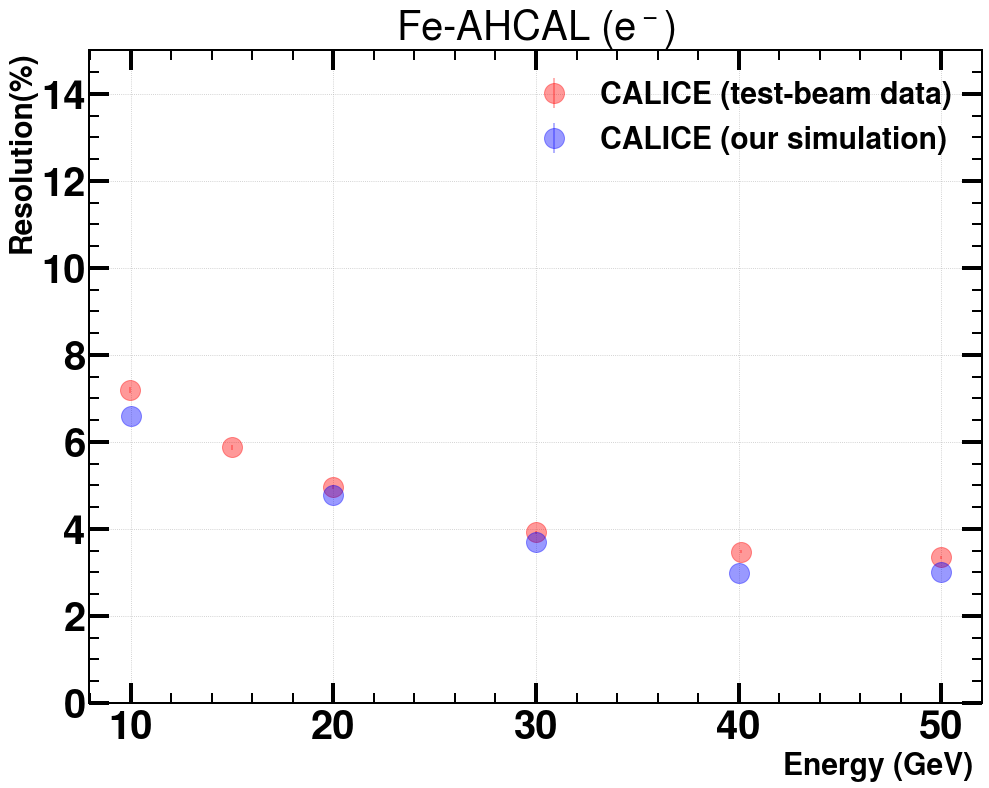

[ 292.84869976  446.21749409  596.92671395  889.47990544 1164.30260047
 1430.26004728]



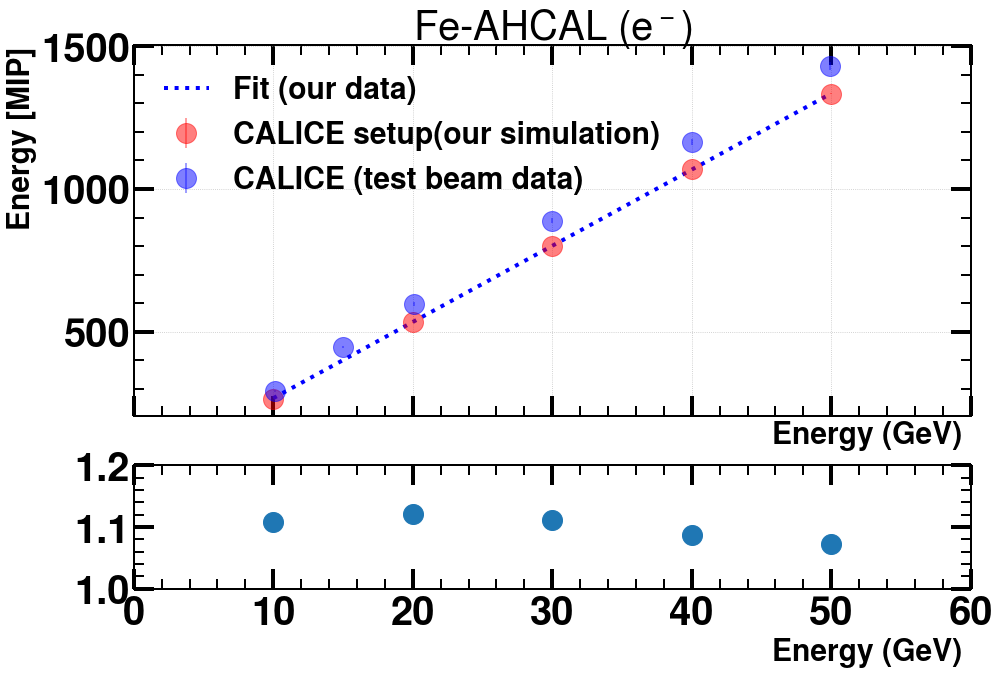

In [63]:
#### FOR ELECTRON RESOLUTION
energies_el=[10,20,30,40,50]           
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

energies_el=np.asarray(energies_el)
el_resolutionsCAL_St=np.asarray(el_resolutionsCAL_St)
el_resolutions_errorsCAL_St=np.asarray(el_resolutions_errorsCAL_St)

el_resolutions=np.asarray(el_resolutions)
el_resolutions_errors=np.asarray(el_resolutions_errors)

el_resolutions_NH=np.asarray(el_resolutions_NH)
el_resolutions_errors_NH=np.asarray(el_resolutions_errors_NH)

mask=energies_el<60

ax.errorbar(energy_cal_e_St,cal_e_res_St, cal_e_res_err,color="red",marker='o',alpha=0.4,linestyle='None',markersize=20,label='CALICE (test-beam data)')

ax.errorbar(energies_el,el_resolutionsCAL_Stp, el_resolutions_errorsCAL_St,color="blue",alpha=0.4,linestyle='None',marker='o',markersize=20,label='CALICE (our simulation)')
#ax.errorbar(energies_el,el_resolutionsCAL_St, el_resolutions_errorsCAL_St[mask],alpha=0.4,linestyle='None',color="blue",marker='o',markersize=20,label='CALICE setup (our simulation)')
#ax.errorbar(Cal_energy,Cal_res_St, Cal_res_err_St,color="red",marker='o',markersize=20,alpha=0.4,linestyle='None',label='CALICE (test-beam data)')

ax.set_ylabel('Resolution(%)')
ax.set_xlabel('Energy (GeV) ')
ax.set_title("Fe-AHCAL ($e^-$)")
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,15)

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("Resolution")
FigName="Res_e-_St_Energy.png"
plt.legend()
plt.savefig(f"{PathToPlot}{FigName}")
plt.show()




## ELECTRON MEAN VALUE PLOT
conversion_fac_St_el=(1000./(MIP*42.3))
el_meansCAL_St_MIP=np.multiply(el_meansCAL_St,MIP)
el_means_errorCAL_St_MIP=np.multiply(el_means_errorCAL_St,MIP)

paper_mean_el_St_con=np.multiply(paper_mean_el_St,conversion_fac_St_el)
paper_error_mean_el_St_con=np.multiply(paper_error_mean_el_St,conversion_fac_St_el)


energy_MIP_St=np.array([10,20,30,40,50])
#fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
fig,(ax,ax1) = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]},sharex=True )
ax.errorbar(energy_MIP_St,el_meansCAL_St_MIP, el_means_errorCAL_St_MIP ,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20,label='CALICE setup(our simulation)')
ax.errorbar(paper_ene_el_St,paper_mean_el_St_con, paper_error_mean_el_St_con,color="blue",alpha=0.5,marker='o',linestyle='None',markersize=20,label='CALICE (test beam data)')
ax.set_ylabel('Energy [MIP]')
ax.set_xlabel('Energy (GeV) ')
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.set_ylim(0,3500)
ax.set_xlim(0,60)
ax.set_title("Fe-AHCAL ($e^-$)")

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("Resolution")

popt,_popcov=curve_fit(plots.linear_fit,energy_MIP_St,el_meansCAL_St_MIP,p0=[0,10],bounds=(0,101))
slope=popt[0]
intercept=popt[1]
energies=np.asarray(energies)
paper_ene_pi_St=np.asarray(paper_ene_pi_St)
#means=np.asarray(means)
ax.plot(energy_MIP_St,plots.linear_fit(energy_MIP_St,*popt),label='Fit (our data)',color='b',linewidth='4',linestyle='dotted') 
#plt.figtext(0.15,0.8,"m= {0:.2f} and c={1:.2f}".format(slope,intercept),fontweight='bold',fontsize=40)

FigName="Comp_Mean_St_el.png"
ax.legend()
### only take the values in plots for plotting
paper_mean_el_St_eqi=[ 292.848, 596.9267,  889.479, 1164.302, 1430.260]
el_meansCAL_St_MIP_eqi=[ 264.392,  532.744,  800.288, 1070.496, 1333.36 ]
ratio_plot_mean_St_el=np.divide(paper_mean_el_St_eqi,el_meansCAL_St_MIP_eqi)
energy_eqi=[10,20,30,40,50]

print(paper_mean_el_St_con)
print()
ax1.plot(energy_eqi,ratio_plot_mean_St_el,marker='o',markersize='20',linestyle='None')
ax1.set_ylim(1,1.2)
ax1.set_xlabel('Energy (GeV) ')

plt.savefig(f"{PathToPlot}{FigName}")
plt.show()

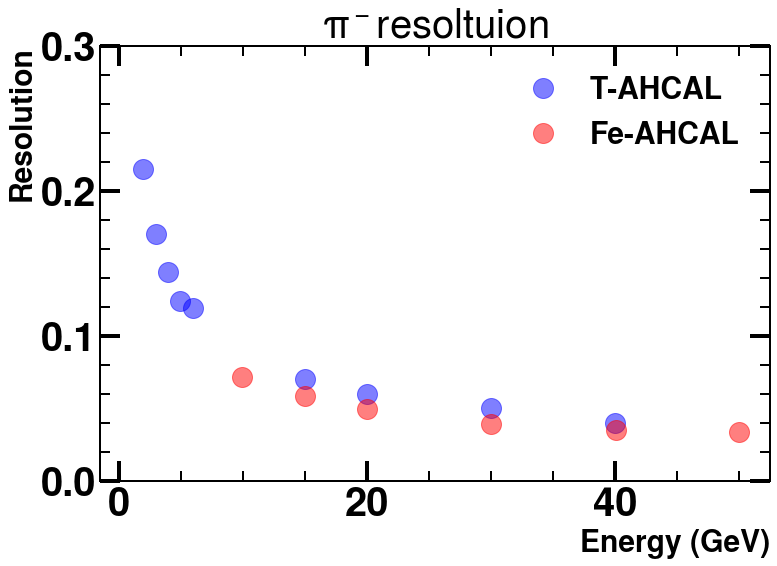

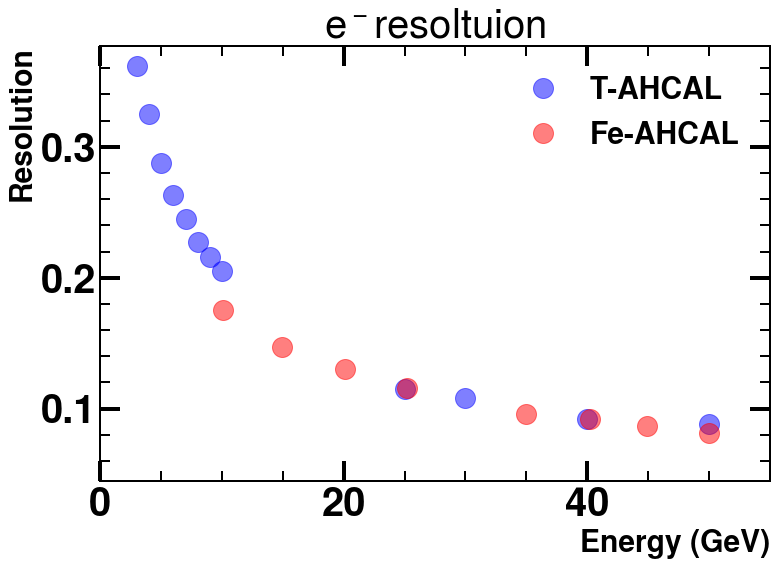

In [22]:
cal_e_res_St_here=np.multiply(cal_e_res_St,0.01)
fig,ax = plt.subplots(1,1, figsize=(12, 8),sharex=True,sharey=True)

ax.plot(Cal_energy,Cal_res,color="blue",alpha=0.5,marker='o',linestyle='None',markersize=20,label='T-AHCAL')
ax.plot(energy_cal_e_St,cal_e_res_St_here,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20,label='Fe-AHCAL')
plt.legend()
ax.set_title('$\pi^- resoltuion$')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Resolution')
ax.set_ylim(0,0.3)
plt.show()


fig,ax = plt.subplots(1,1, figsize=(12, 8),sharex=True,sharey=True)
ax.plot(energy_cal_pi,cal_pi_res,color="blue",alpha=0.5,marker='o',linestyle='None',markersize=20,label='T-AHCAL')
ax.plot(energy_cal_pi_St,cal_pi_res_St,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20,label='Fe-AHCAL')

ax.set_title('$e^- resoltuion$')
ax.set_xlim(0,55)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Resolution')
plt.legend()


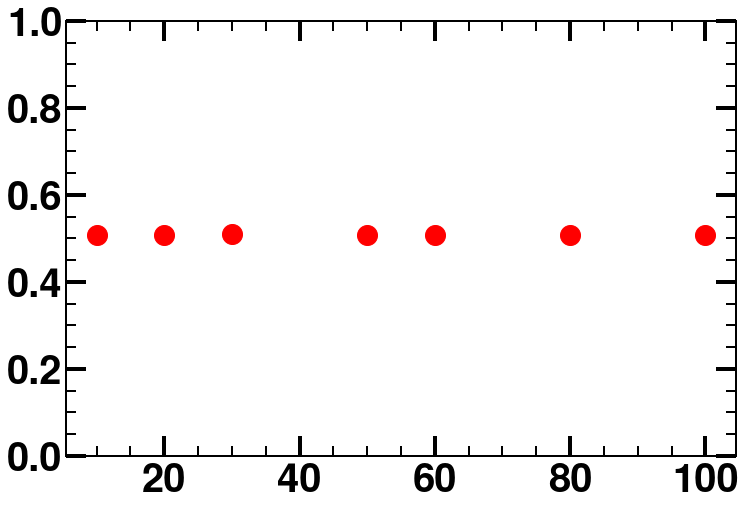

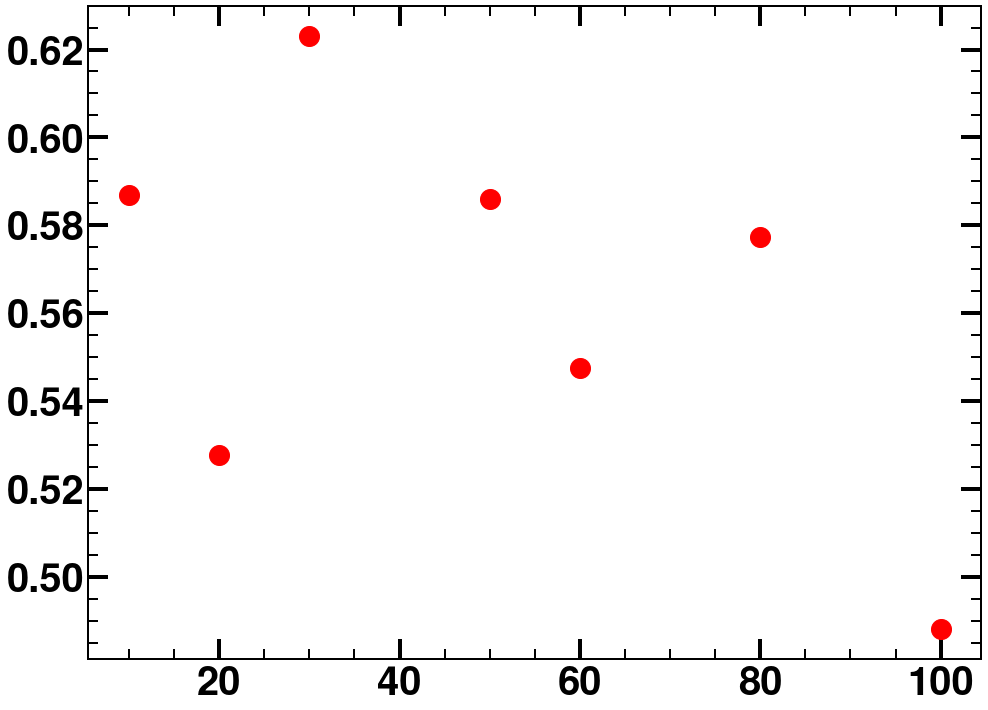

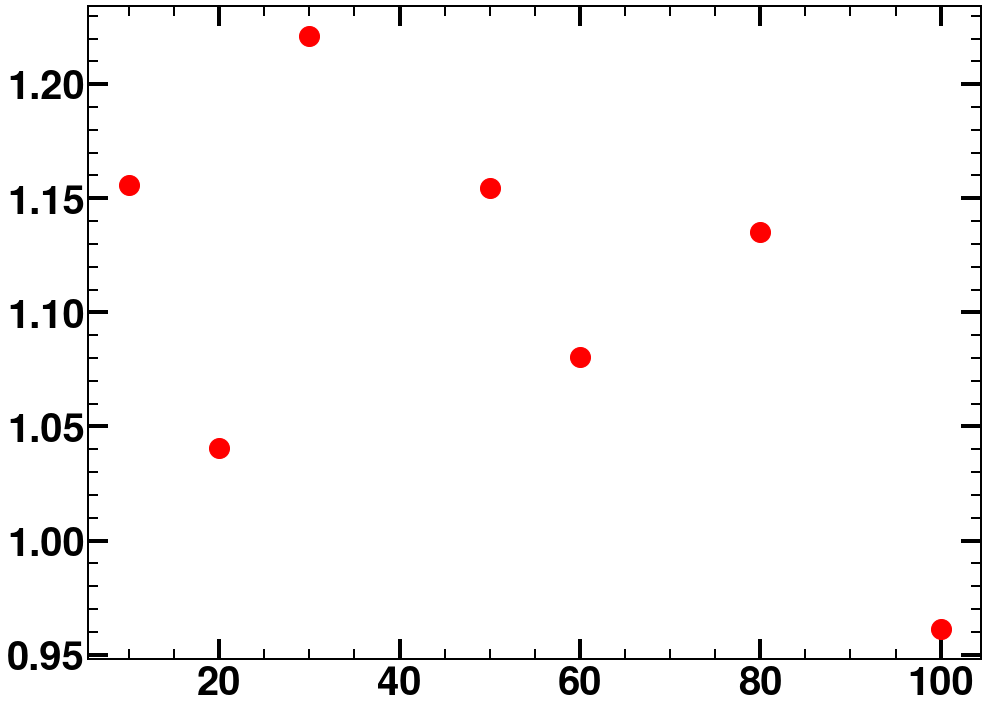

In [30]:
ratio_mean=np.divide(pi_means,pi_meansCAL_T_MIP)
ratio_std=np.divide(pi_stds,pi_stdsCAL_T)
ratio_res=np.divide(pi_resolutions,pi_resolutionsCAL_T)

fig,ax = plt.subplots(1,1, figsize=(12, 8),sharex=True,sharey=True)
ax.plot(energies,ratio_mean,color='r', marker='o',markersize=20,linestyle='None')
ax.set_ylim(0,1)

fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.plot(energies,ratio_std,color='r', marker='o',markersize=20,linestyle='None')

fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.plot(energies,ratio_res,color='r', marker='o',markersize=20,linestyle='None')


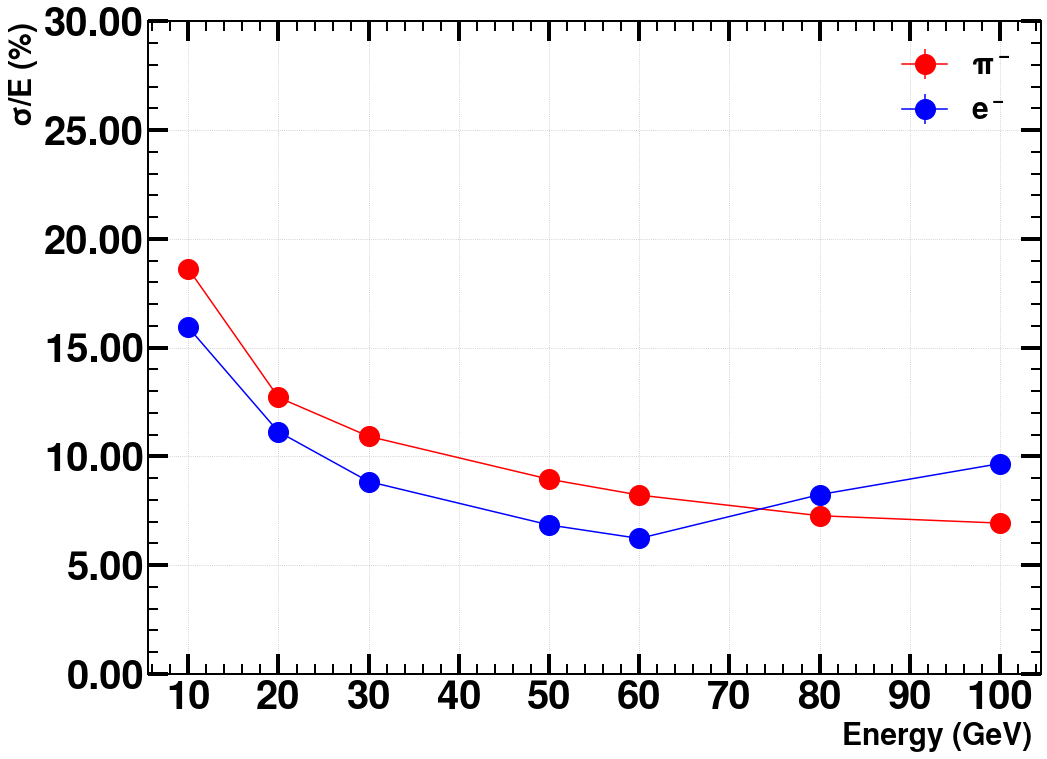

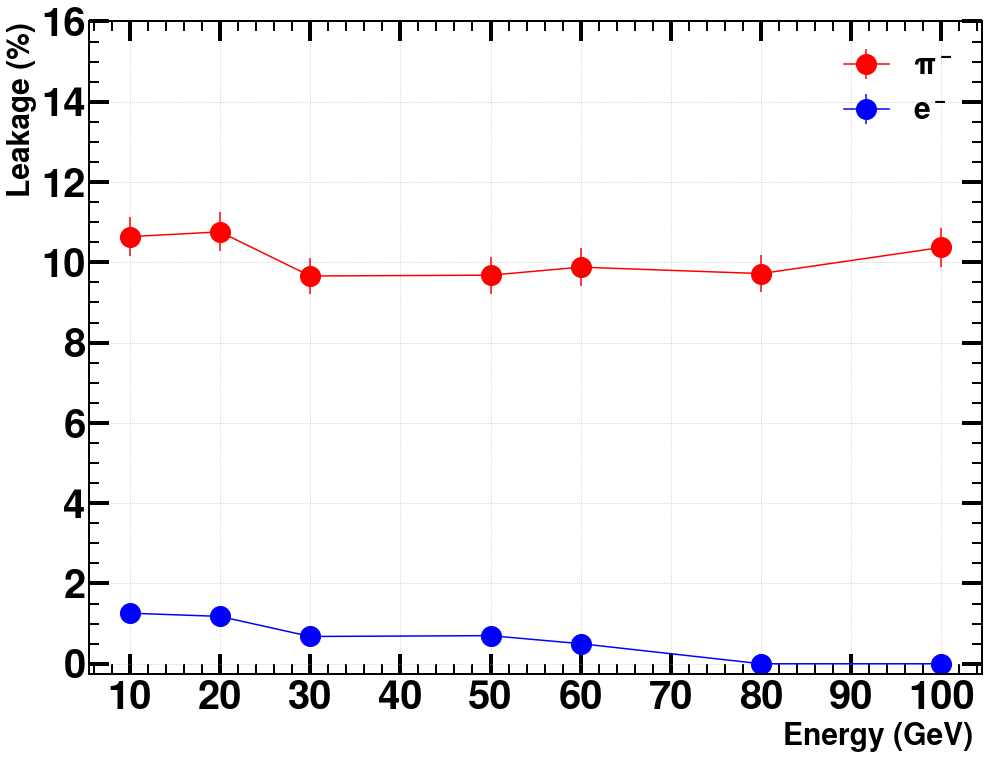

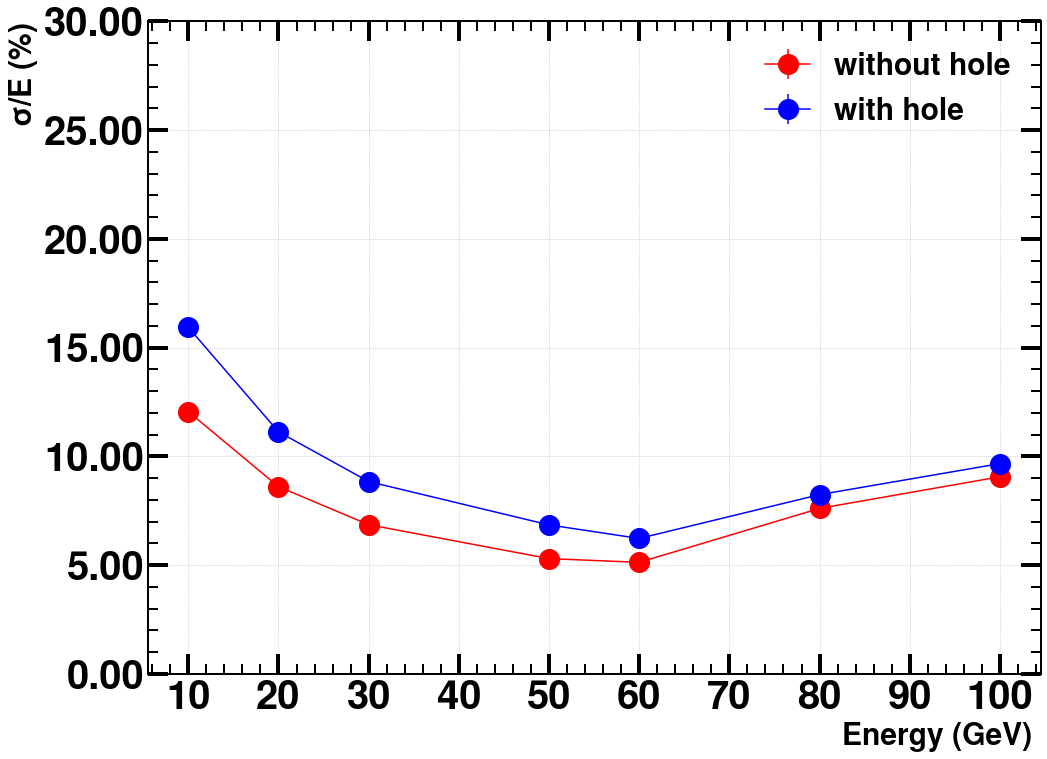

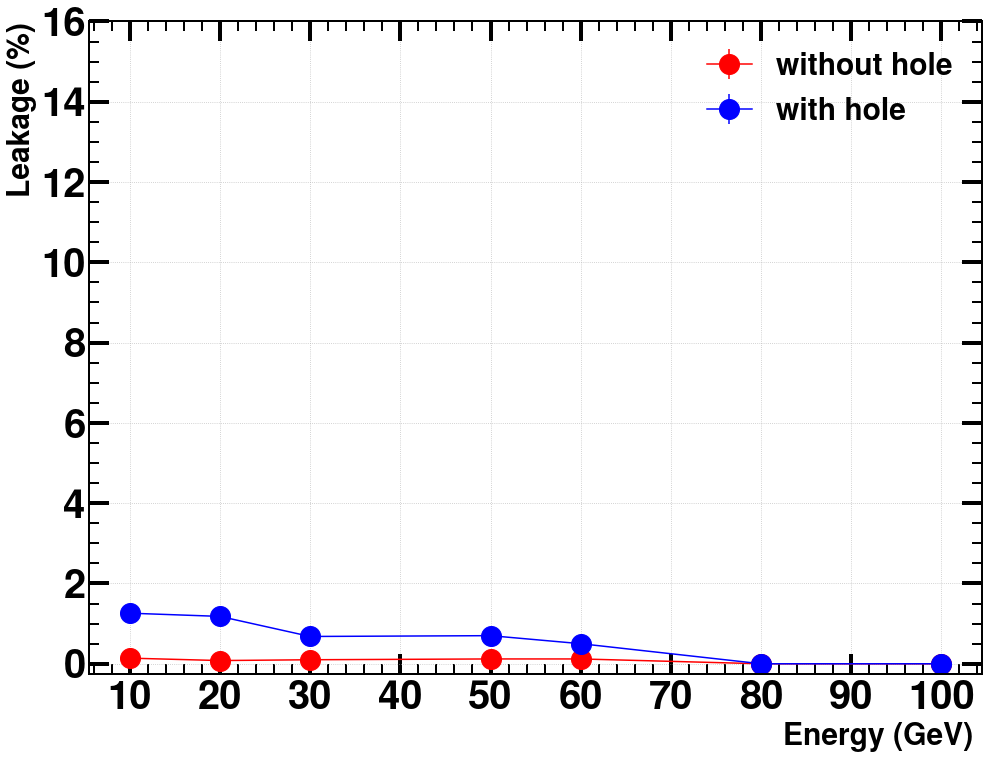

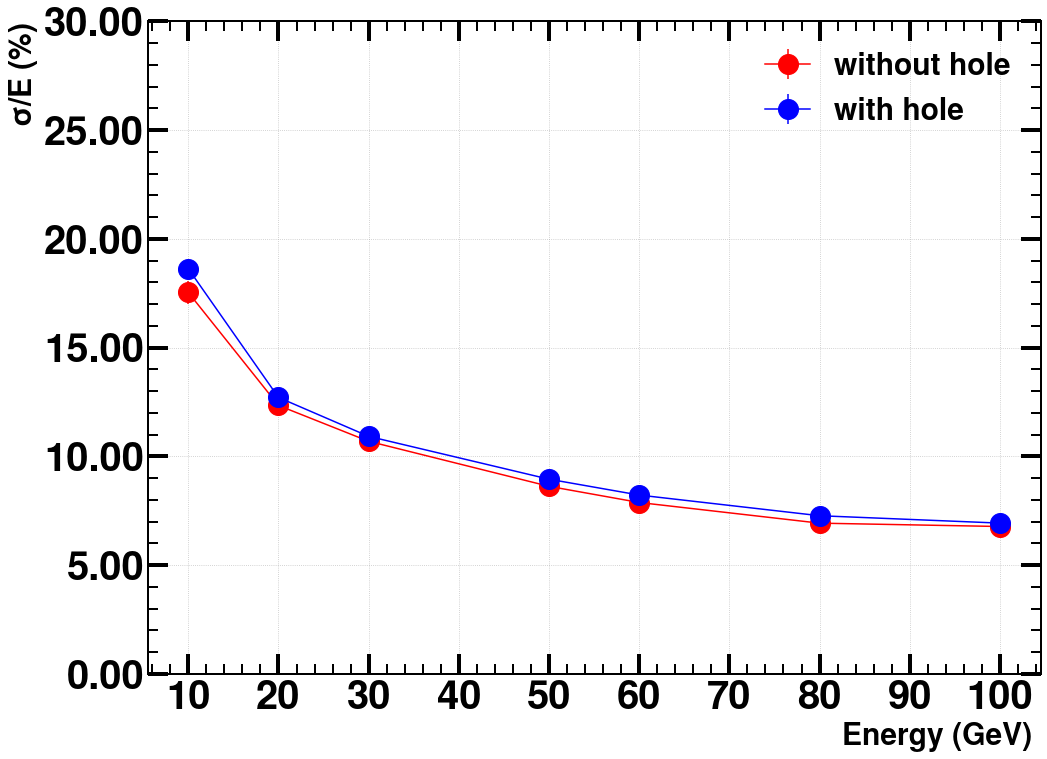

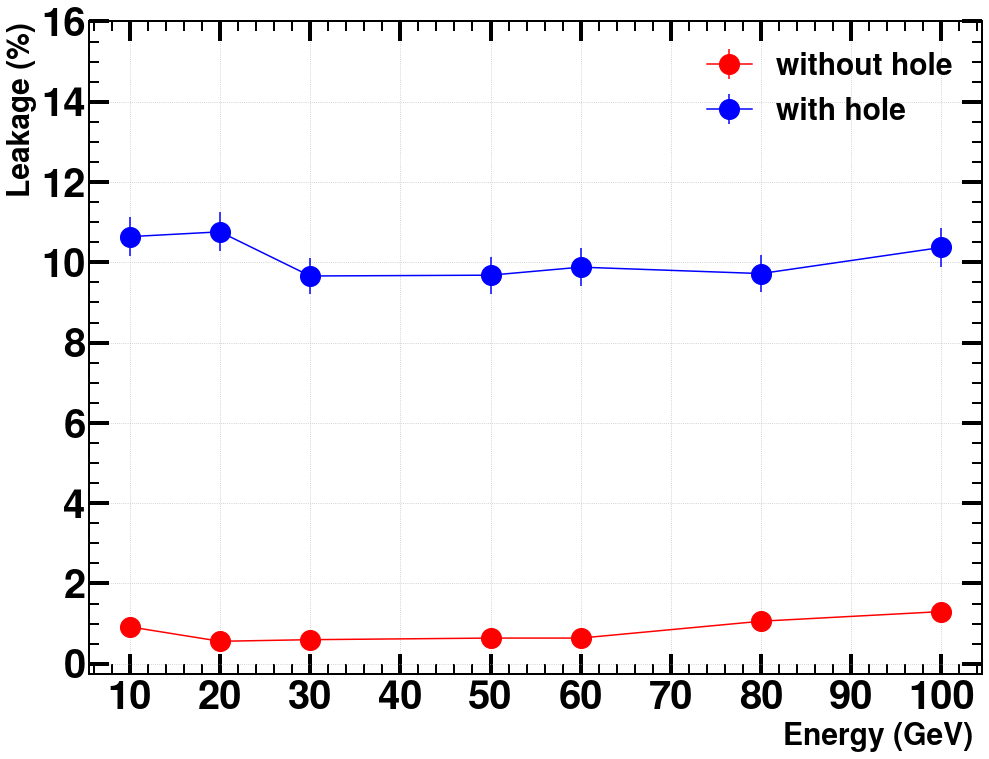

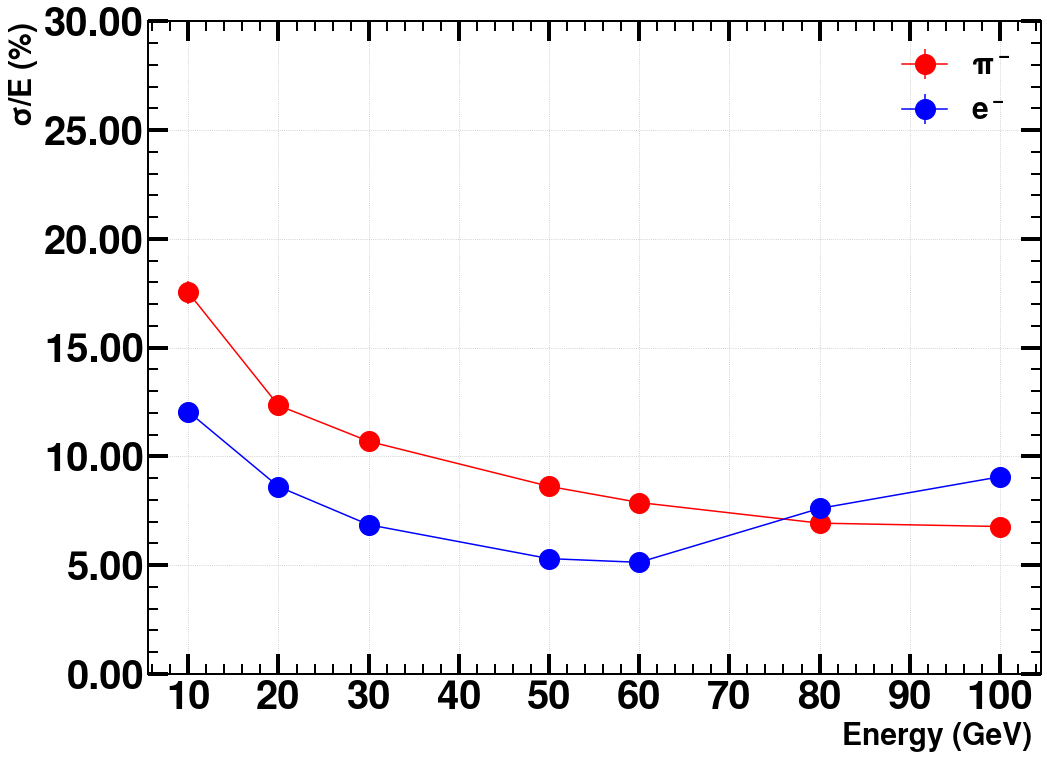

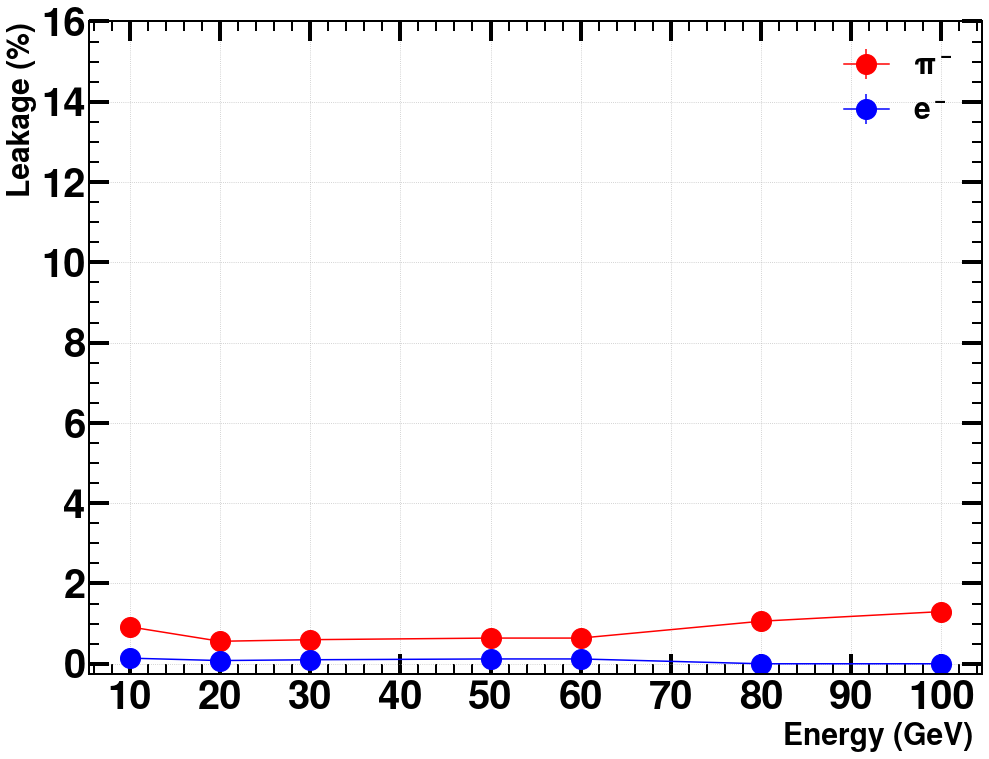

In [23]:
######## Leaks comparision ###########

'''

#def mean_comp_e_pi(energies, )
#### Mean comparsion
MIP_val=0.6 ## MeV
energies=np.asarray(energies)
el_means_error=np.asarray(el_means_error)
pi_means_error=np.asarray(pi_means_error)
mask=energies<70

el_means=np.divide(el_means,MIP_val)
el_means_errors=np.divide(el_means_error,MIP_val)
pi_means=np.divide(pi_means,MIP_val)
pi_means_errors=np.divide(pi_means_error,MIP_val)
ratio_mean=el_means[mask]/pi_means[mask]
#print(el_resolutions)



#print(energies)





fig,(ax,ax1) = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
ax.errorbar(energies[mask],pi_means[mask], pi_means_errors[mask] ,color="red",marker='o',linestyle='None',markersize=20,label='$\pi^-$')
ax.errorbar(energies[mask],el_means[mask], el_means_errors[mask],color="blue",marker='o',linestyle='None',markersize=20,label='$e^-$')
ax.set_ylabel('Mean energy [MIP]')
ax.set_xlabel('Energy (GeV) ')
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,1500)
ax.set_xlim(0,70)

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("Resolution")
FigName="Comp_Mean_e_pi.png"
ax.legend()


ax1.plot(energies[mask], ratio_mean, color='red', marker='s',markersize=20)
ax1.set_ylim(0.8,1.0)
ax1.yaxis.set_major_locator(MultipleLocator(0.1))
ax1.set_ylabel('e/h')
ax1.set_xlabel('Energy (GeV) ')




plt.savefig(f"{PathToPlot}{FigName}")
plt.show()
print(pi_means_error[mask])
print(el_means_error[mask])







'''





condition1='el_pion_withhole'
condition2='el_with_wout_hole'
condition3='pi_with_wout_hole'
condition4='el_pion_wout_hole'

## electron and pion without hole
plots.res_comp_hole_nohole(energies,condition1,el_resolutions,el_resolutions_errors, pi_resolutions,pi_resolutions_errors)
plots.Leakage_comp(energies,condition1,pi_leaks_per,pi_leaks_per_error,el_leaks_per,el_leaks_per_error)

## electron with and without hole
plots.res_comp_hole_nohole(energies,condition2,el_resolutions,el_resolutions_errors, el_resolutions_NH,el_resolutions_errors_NH)
plots.Leakage_comp(energies,condition2,el_leaks_per_NH,el_leaks_per_error_NH,el_leaks_per,el_leaks_per_error)
### pion with and without hole
plots.res_comp_hole_nohole(energies,condition3,pi_resolutions,pi_resolutions_errors, pi_resolutions_NH,pi_resolutions_errors_NH)
plots.Leakage_comp(energies,condition3,pi_leaks_per_NH,pi_leaks_per_error_NH,pi_leaks_per,pi_leaks_per_error)


### electron and pion with out hole
plots.res_comp_hole_nohole(energies,condition4,el_resolutions_NH,el_resolutions_errors_NH, pi_resolutions_NH,pi_resolutions_errors_NH)
plots.Leakage_comp(energies,condition4,pi_leaks_per_NH,pi_leaks_per_error_NH,el_leaks_per_NH,el_leaks_per_error_NH)


#print(el_resolutions)


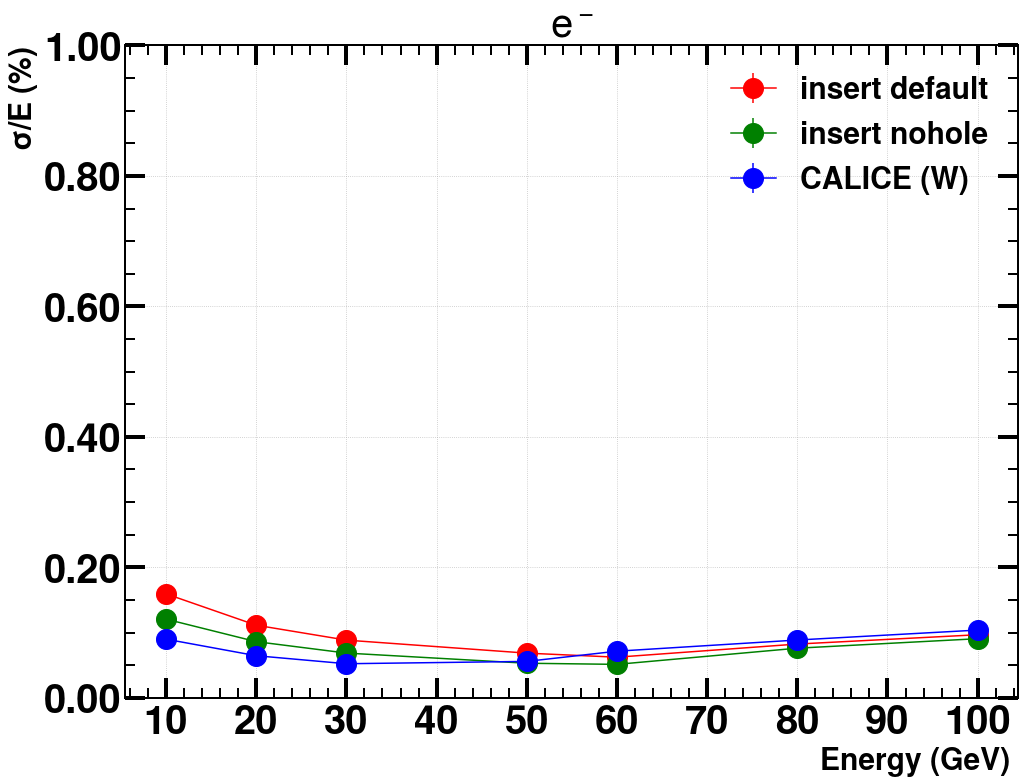

[ 543.75  720.   1088.75 1437.5 ]
[ 101.625  130.     167.5    200.     228.75   265.     288.75   328.75
  877.5   1047.5   1387.5   1750.    2075.    2750.    3462.5   4125.   ]


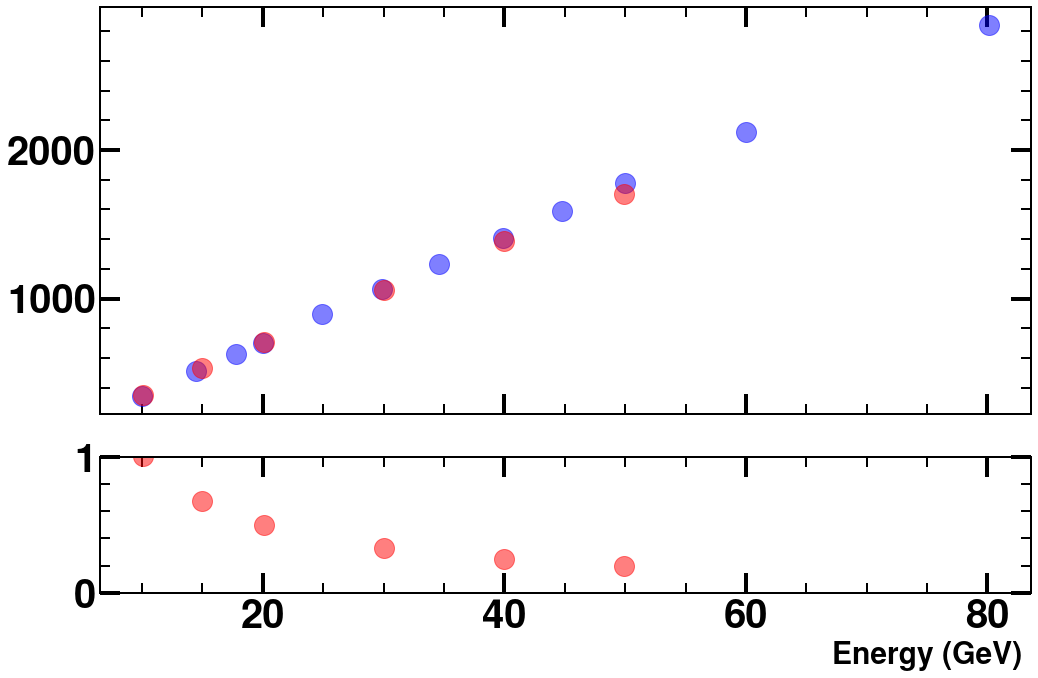

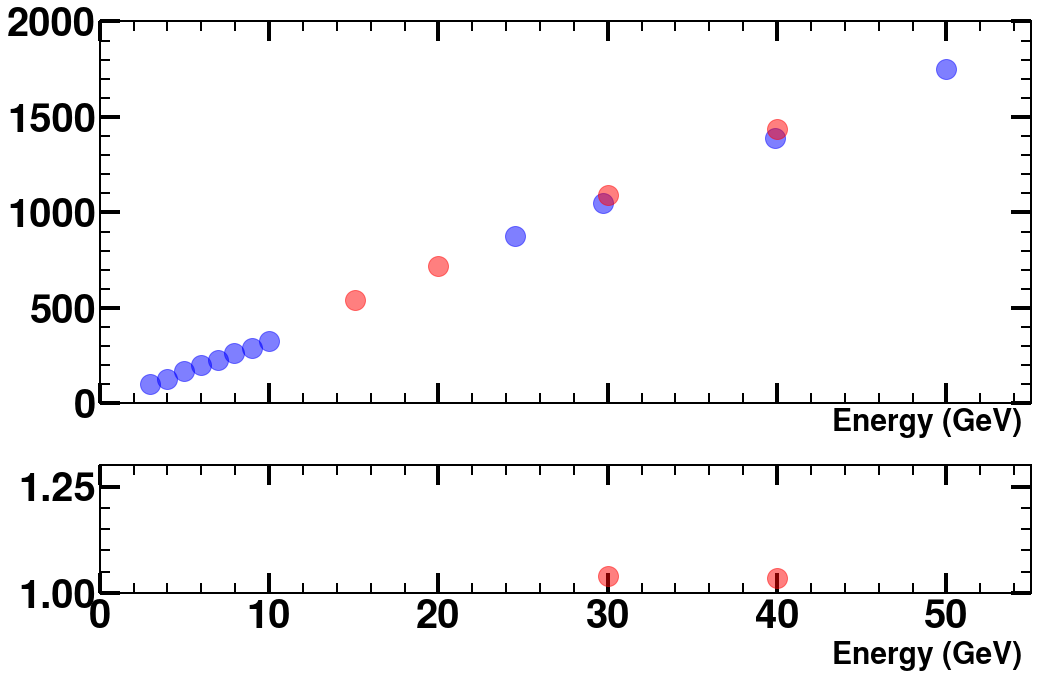

'\n(paper_ene_el_St, paper_mean_el_St) \n\n(paper_ene_pi_St, paper_mean_pi_St_con)\n\n### Tungsten\n(paper_ene_el,paper_mean_el)\n(paper_ene_pi,paper_mean_pi)\n'

In [77]:
eh_ratio=1.19
conversion_fac_St_pi=(1000.*eh_ratio)/(MIP*42.3)
conversion_fac_St_el=1.0/MIP

paper_mean_el_T_con=np.divide(paper_mean_el,MIP)
paper_mean_pi_T_con=np.divide(paper_mean_pi,MIP)


#print(paper_mean_el_T_con)

#print(paper_mean_pi_T_con)
#fig,ax = plt.subplots(1,1, figsize=(12, 8),sharex=True,sharey=True)
fig,(ax,ax1) = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]},sharex=True )

paper_mean_pi_St_con=np.multiply(paper_mean_pi_St,conversion_fac_St_pi)
paper_error_mean_pi_St_con=np.multiply(paper_error_mean_pi_St,conversion_fac_St_pi)
paper_mean_el_St_con=np.multiply(paper_mean_el_St,conversion_fac_St_pi)
ratio_St_eh=[]
index_to_ratio=[0,1,3,5,7,9]
for index in index_to_ratio:
    index_el=0
    ratio_St_eh.append(paper_mean_el_St_con[index_el]/paper_mean_pi_St_con[index])
    index_el+=1
#print(paper_mean_pi_St_con)
#print(paper_error_mean_pi_St_con)
#print(ratio_St_eh)
### T
print(paper_mean_el_St_con)
print(paper_mean_pi_St_con)

ax.plot(paper_ene_pi_St,paper_mean_pi_St_con,color="blue",alpha=0.5,marker='o',linestyle='None',markersize=20,label='Fe-AHCAL(pion)')
ax.plot(paper_ene_el_St,paper_mean_el_St_con,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20,label='Fe-AHCAL(pion)')
ax1.plot(paper_ene_el_St,ratio_St_eh,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20)
ax1.set_ylim(0,1.0)
ax1.set_xlabel('Energy (GeV) ')

plt.tight_layout()
plt.show()


fig,(ax,ax1) = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]},sharex=True )
index_T=[]
ax.plot(paper_ene_pi,paper_mean_pi_T_con,color="blue",alpha=0.5,marker='o',linestyle='None',markersize=20,label='T-AHCAL(pion)')

ax.plot(paper_ene_el,paper_mean_el_T_con,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20,label='T-AHCAL(pion)')
ax.set_xlim(0,55)
ax.set_ylim(0,2000)
ax.set_xlabel('Energy (GeV) ')

energy_T_eh_here=[30,40]
e_T_here=[  1088.75, 1437.5 ]
pi_T_here=[  1047.5,   1387.5   ]
ratio_eh_T_here=np.divide(e_T_here,pi_T_here)
ax1.plot(energy_T_eh_here,ratio_eh_T_here,color="red",alpha=0.5,marker='o',linestyle='None',markersize=20)
ax1.set_ylim(1,1.3)
ax1.set_xlabel('Energy (GeV) ')

plt.tight_layout()
plt.show()



'''
(paper_ene_el_St, paper_mean_el_St) 

(paper_ene_pi_St, paper_mean_pi_St_con)

### Tungsten
(paper_ene_el,paper_mean_el)
(paper_ene_pi,paper_mean_pi)
'''



In [31]:
[871, 1150.0]
[838, 1110.0]
[  1088.75 1437.5 ]
[  1047.5   1387.5     ]
import math
theta_to_rad=math.pi/180.


thetas=np.array([2.32, 2.56, 2.83, 3.13, 3.46, 3.82, 4.23])
etas=np.array(  [3.9,  3.8,  3.7,  3.6,  3.5,  3.4,  3.3])


minus_theta=180-thetas
theta_rad_half=np.sin(thetas*theta_to_rad/2.0)

calc_etas=np.log(theta_rad_half)*-1.0

#diff_eta=calc_etas-etas
np.set_printoptions(precision=2)
#print(diff_eta)  
print(calc_etas)

[inf 3.9 3.8 3.7 3.6 3.5 3.4 3.3]


/tmp/ipykernel_766952/855435803.py:8: RuntimeWarning: divide by zero encountered in log
  calc_etas=np.log(theta_rad_half)*-1.0


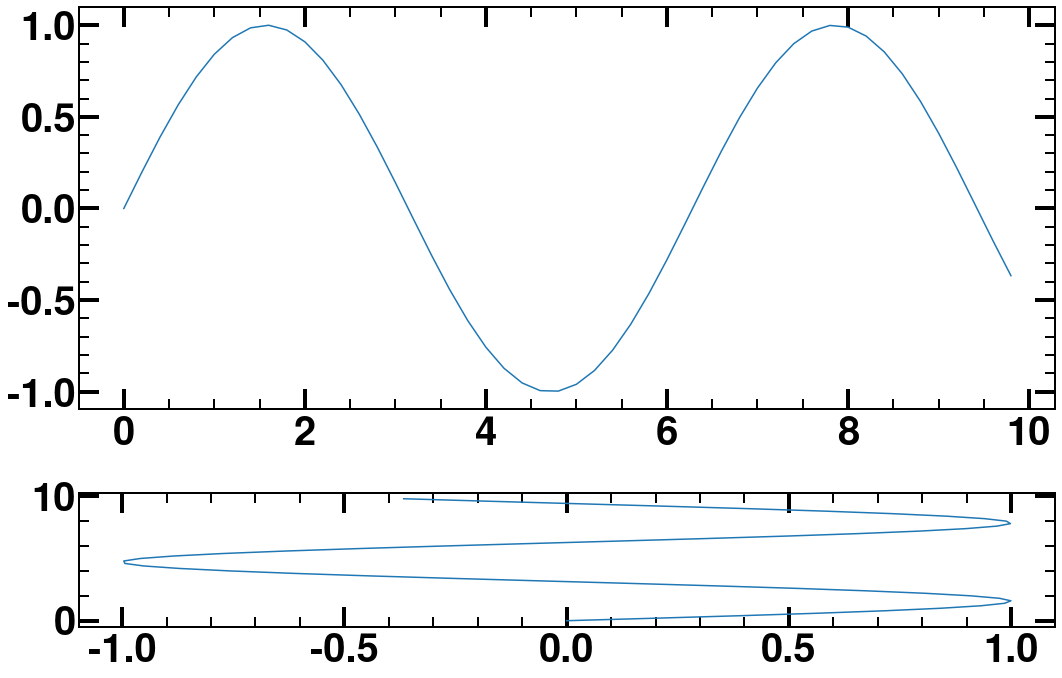

In [12]:




import numpy as np
import matplotlib.pyplot as plt 

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
a0.plot(x, y)
a1.plot(y, x)

f.tight_layout()
#f.savefig('grid_figure.pdf')

<AxesSubplot:xlabel='energy'>

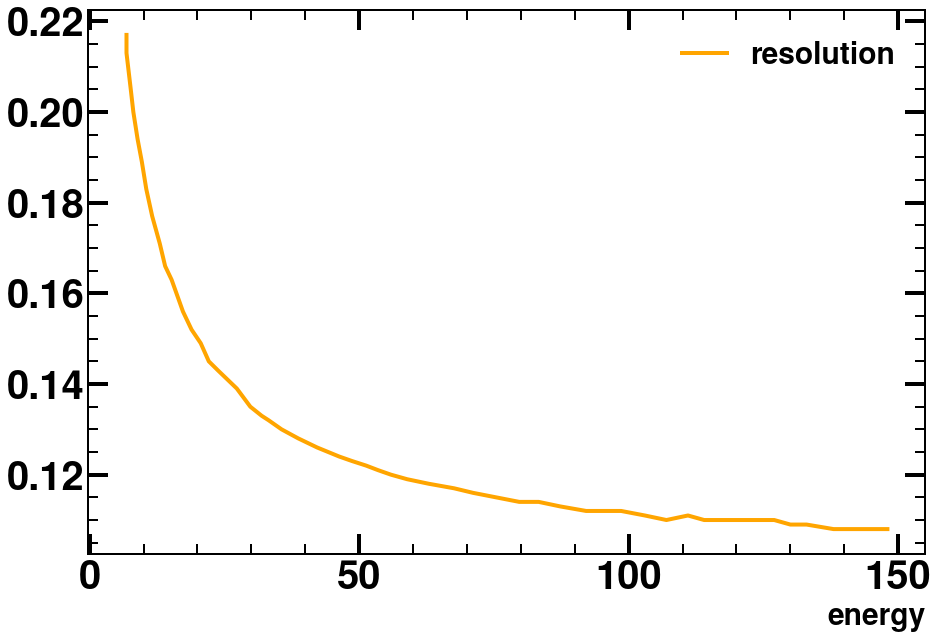

In [65]:

#df.plot(df['energy'],df['resolution'],linestyle='solid',linewidth=4,color='orange')

In [28]:




paper_ene_pi_St=[80.1,60.0, 50.0,44.8, 39.9, 34.6,29.9, 24.9, 20.0,17.8, 14.5, 10.0] ## From paper
paper_mean_pi_St=[80.7,60.3,50.5,45.2,40.0,35.0,30.3,25.5,19.9,17.8,14.6,9.81]
#kera=[2837.854, 2120.478,  1775.85,   1589.47, 1406.619, 1230.791, 1065.51,   896.71,  699.79,  625.945,  513.41,  344.97]
#kera.sort()




kera=[80.1,60.0, 50.0,44.8, 39.9, 34.6,29.9, 24.9, 20.0,17.8, 14.5, 10.0] ## From paper

#kera=[80.7,60.3,50.5,45.2,40.0,35.0,30.3,25.5,19.9,17.8,14.6,9.81]
kera.sort()
print(kera)
#print(paper_mean_pi_St.sort())






[10.0, 14.5, 17.8, 20.0, 24.9, 29.9, 34.6, 39.9, 44.8, 50.0, 60.0, 80.1]


In [ ]:
[ 10,  20  30  40  50  60  80 100]
[ 405.3625,  812.775,  1220.2375, 1643.0625, 2027.325,  2464.8875, 3239.05]
[344.9734, 513.416,625.9456, 699.79314, 896.719, 1065.51,  1230.791 ,1406.61938534,1589.479,  1775.85, ]

[80.1, 60.0, 50.0, 44.8, 39.9, 34.6, 29.9, 24.9, 20.0, 17.8, 14.5, 10.0]
[2837.85460993 2120.4787234   
      
   ]


paper_ene_pi_St=[80.1,60.0, 50.0,44.8, 39.9, 34.6,29.9, 24.9, 20.0,17.8, 14.5, 10.0] ## From paper
paper_mean_pi_St=[80.7,60.3,50.5,45.2,40.0,35.0,30.3,25.5,19.9,17.8,14.6,9.81]